<b><font color="SteelBlue" size="+3">Anticipez les besoins en consommation de bâtiments <br>
Prediction EnergyUse</font></b>

Ce notebook est la suite du notebook d'exploration des données Deveau_Estelle_1_notebook_exploratoire_022024

# Introduction

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate
import time
from scipy.stats import uniform
from sklearn.inspection import permutation_importance
from scipy.stats import uniform, loguniform
import shap

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_exploratoire_022024.ipynb',
 'Deveau_Estelle_2_notebook_prediction_EnergyUse_022024.ipynb',
 'Deveau_Estelle_3_notebook_prediction_GHGEmissions_022024.ipynb',
 'Map_of_Seattle,_divided_by_districts.png',
 'OC_projet4.pptx',
 'svg']

In [3]:
os.listdir("data/cleaned/")

['df_cleaned.csv']

In [4]:
path     = "./data/cleaned/"
filename = "df_cleaned.csv"

In [5]:
df = pd.read_csv(path + filename)
df.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12             88434             60.0   
1                1.0              11            103566             61.0   
2                1.0              41            956110             43.0   
3                1.0              10             61320             56.0   
4                1.0              11             83008             27.0   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
0              7456910.0             249.98           89   
1              8664479.0             295.86           20   
2             73937112.0            2089.28           47   
3              6946800.5             286.43           90   
4              6062767.5             176.14           90   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  ...  \
0                         1     26.872820        52.917723  ...   
1                         3      0.000000        37.426959  ...   
2                         1     29.168781        66.984851  ...   
3                         1     31.877211        39.858983  ...   
4                         1      0.000000        46.368511  ...   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   
1                      0.0             0.0                  0.0   
2                      0.0             0.0                  0.0   
3                      0.0             0.0                  0.0   
4                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   
1            0.0                        0.0   
2            0.0                        0.0   
3            0.0                        0.0   
4            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                             0.000000                          0.0   
1                             3.896148                          0.0   
2                             0.000000                          0.0   
3                             0.000000                          0.0   
4                             0.000000                          0.0   

   GFA_Supermarche_pct  Log_TotalGHGEmissions  Log_SiteEnergyUseWN  
0                  0.0               5.521381            15.824652  
1                  0.0               5.689886            15.974742  
2                  0.0               7.644575            18.118725  
3                  0.0               5.657494            15.753792  
4                  0.0               5.171279            15.617677  

[5 rows x 27 columns]

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(1135, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       1135 non-null   float64
 1   NumberofFloors                          1135 non-null   int64  
 2   PropertyGFATotal                        1135 non-null   int64  
 3   ENERGYSTARScore                         725 non-null    float64
 4   SiteEnergyUseWN(kBtu)                   1135 non-null   float64
 5   TotalGHGEmissions                       1135 non-null   float64
 6   BuildingAge                             1135 non-null   int64  
 7   NumberOfPropertyUseTypes                1135 non-null   int64  
 8   SteamUse_pct                            1135 non-null   float64
 9   Electricity_pct                         1135 non-null   float64
 10  NaturalGas_pct                          1135 non-null   floa

In [9]:
df.describe()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
count        1135.000000     1135.000000      1.135000e+03       725.000000   
mean            1.138326        3.954185      1.041771e+05        63.257931   
std             1.254720        6.194782      1.957131e+05        28.022159   
min             1.000000        1.000000      1.128500e+04         1.000000   
25%             1.000000        1.000000      2.774000e+04        44.000000   
50%             1.000000        2.000000      4.447600e+04        70.000000   
75%             1.000000        4.000000      8.977500e+04        87.000000   
max            27.000000       76.000000      2.200000e+06       100.000000   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
count           1.135000e+03        1135.000000  1135.000000   
mean            7.195675e+06         155.616855    57.340088   
std             1.859154e+07         545.543551    32.096206   
min             5.811420e+04           0.400000     1.000000   
25%             1.220033e+06          19.210000    33.000000   
50%             2.472120e+06          46.490000    54.000000   
75%             6.362965e+06         127.850000    88.000000   
max             2.959299e+08       12307.160000   116.000000   

       NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
count               1135.000000   1135.000000      1135.000000   
mean                   1.854626      1.876148        66.117254   
std                    1.176269      8.330666        26.852495   
min                    1.000000      0.000000         0.000000   
25%                    1.000000      0.000000        44.369063   
50%                    1.000000      0.000000        64.986506   
75%                    2.000000      0.000000        94.885099   
max                    9.000000     64.773098       100.000000   

       NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
count     1135.000000      1135.000000        1135.000000   
mean        26.782610         2.751575           4.717107   
std         23.814148         8.499669          19.290353   
min          0.000000         0.000000           0.000000   
25%          0.000000         0.000000           0.000000   
50%         26.072621         0.000000           0.000000   
75%         46.638617         0.000000           0.000000   
max         97.077764        78.377781         100.000000   

       GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
count                             1135.000000              1135.000000   
mean                                 3.205735                 9.279812   
std                                 15.576466                24.975130   
min                                  0.000000                 0.000000   
25%                                  0.000000                 0.000000   
50%                                  0.000000                 0.000000   
75%                                  0.000000                 0.000000   
max                                100.000000               100.000000   

       GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
count     1135.000000        1135.000000              1135.000000   
mean        10.157794           5.806918                 8.009327   
std         25.430441          22.729723                23.828785   
min          0.000000           0.000000                 0.000000   
25%          0.000000           0.000000                 0.000000   
50%          0.000000           0.000000                 0.000000   
75%          3.229034           0.000000                 0.000000   
max        100.000000         100.000000               100.000000   

       GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
count     1135.000000          1135.000000    1135.000000   
mean        24.169895            20.048911       2.068092   
std         35.992605            36.974703      13.681383   
min          0.000000             0.0000

Dans un premier temps, nous allons travailler en excluant l'ENERGYSTARScore puis nous ferons une comparaison avec son utilisation.

# Modelisation sans l'Energy Star Score

## Importance des features

### Data preparation

In [212]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df['Log_SiteEnergyUseWN']

In [213]:
# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [214]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Parking_pct  GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              0.0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

### Séparation des données

In [215]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((908, 22), (227, 22))

In [216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 12 to 1126
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       908 non-null    float64
 1   NumberofFloors                          908 non-null    int64  
 2   PropertyGFATotal                        908 non-null    int64  
 3   BuildingAge                             908 non-null    int64  
 4   NumberOfPropertyUseTypes                908 non-null    int64  
 5   SteamUse_pct                            908 non-null    float64
 6   Electricity_pct                         908 non-null    float64
 7   NaturalGas_pct                          908 non-null    float64
 8   GFA_Parking_pct                         908 non-null    float64
 9   GFA_Residence_pct                       908 non-null    float64
 10  GFA_Loisirs_Shopping_ServicesPerso_pct  908 non-null    float64
 

In [217]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12                 1.0               5             57452          109   
381                1.0               2            123000           50   
717                1.0               2             40657           19   
497                1.0               1             29740           55   
967                1.0               3             30408           36   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                          5     22.548591        47.793403       26.215991   
381                         2      0.000000       100.000000        0.000000   
717                         2      0.000000        96.960067        2.984884   
497                         2      0.000000        82.125234       13.557044   
967                         2      0.000000        98.006080        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
12               0.0                0.0   
381              0.0                0.0   
717              0.0                0.0   
497              0.0                0.0   
967              0.0                0.0   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
12                                      0.0                28.618673   
381                                     0.0                 0.000000   
717                                     0.0                 0.000000   
497                                     0.0                 0.000000   
967                                     0.0               100.000000   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
12        27.438557                0.0                      0.0   
381        0.000000                0.0                      0.0   
717        0.000000                0.0                      0.0   
497        0.000000                0.0                      0.0   
967        0.000000                0.0                      0.0   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
12        16.955023             0.000000            0.0   
381       17.845118            82.154882            0.0   
717      100.000000             0.000000            0.0   
497       59.322937            40.677063            0.0   
967        0.000000             0.000000            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
12                         0.0                            26.987746   
381                        0.0                             0.000000   
717                        0.0                             0.000000   
497                        0.0                             0.000000   
967                        0.0                             0.000000   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
12                           0.0                  0.0  
381                          0.0                  0.0  
717                          0.0                  0.0  
497                          0.0                  0.0  
967                          0.0                  0.0

In [218]:
y_train.head()

12     15.879485
381    14.915546
717    14.855216
497    14.242908
967    14.200679
Name: Log_SiteEnergyUseWN, dtype: float64

### Standardisation

In [219]:
scaler = StandardScaler()

# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12           -0.118616        0.180511         -0.242440     1.613289   
381          -0.118616       -0.316168          0.082463    -0.226839   
717          -0.118616       -0.316168         -0.325688    -1.193685   
497          -0.118616       -0.481728         -0.379800    -0.070896   
967          -0.118616       -0.150608         -0.376489    -0.663479   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                   2.696793      2.497745        -0.663238       -0.047874   
381                  0.142529     -0.222517         1.287912       -1.149670   
717                  0.142529     -0.222517         1.174299       -1.024222   
497                  0.142529     -0.222517         0.619867       -0.579900   
967                  0.142529     -0.222517         1.213392       -1.149670   

     GFA_Parking_pct  GFA_Residence_pct  \
12         -0.315565          -0.254048   
381        -0.315565          -0.254048   
717        -0.315565          -0.254048   
497        -0.315565          -0.254048   
967        -0.315565          -0.254048   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
12                                -0.203361                 0.814335   
381                               -0.203361                -0.363496   
717                               -0.203361                -0.363496   
497                               -0.203361                -0.363496   
967                               -0.203361                 3.752106   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
12         0.668120          -0.260516                -0.336123   
381       -0.398517          -0.260516                -0.336123   
717       -0.398517          -0.260516                -0.336123   
497       -0.398517          -0.260516                -0.336123   
967       -0.398517          -0.260516                -0.336123   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
12        -0.189155            -0.541168      -0.162757   
381       -0.164347             1.684559      -0.162757   
717        2.125451            -0.541168      -0.162757   
497        0.991711             0.560849      -0.162757   
967       -0.661721            -0.541168      -0.162757   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
12                   -0.167941                             1.458989   
381                  -0.167941                            -0.221555   
717                  -0.167941                            -0.221555   
497                  -0.167941                            -0.221555   
967                  -0.167941                            -0.221555   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
12                     -0.097666            -0.187021  
381                    -0.097666            -0.187021  
717                    -0.097666            -0.187021  
497                    -0.097666            -0.187021  
967                    -0.097666            -0.187021

### Test de Student

In [220]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     78.77
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):          5.58e-191
Time:                         11:14:30   Log-Likelihood:                -1012.8
No. Observations:                  908   AIC:                             2072.
Df Residuals:                      885   BIC:                             2182.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [221]:
# Suppression du NumberofFloors
X_train_scaled_df.drop(columns=['GFA_Parking_pct'], inplace=True)

In [222]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     82.56
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):          7.19e-192
Time:                         11:14:31   Log-Likelihood:                -1013.0
No. Observations:                  908   AIC:                             2070.
Df Residuals:                      886   BIC:                             2176.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

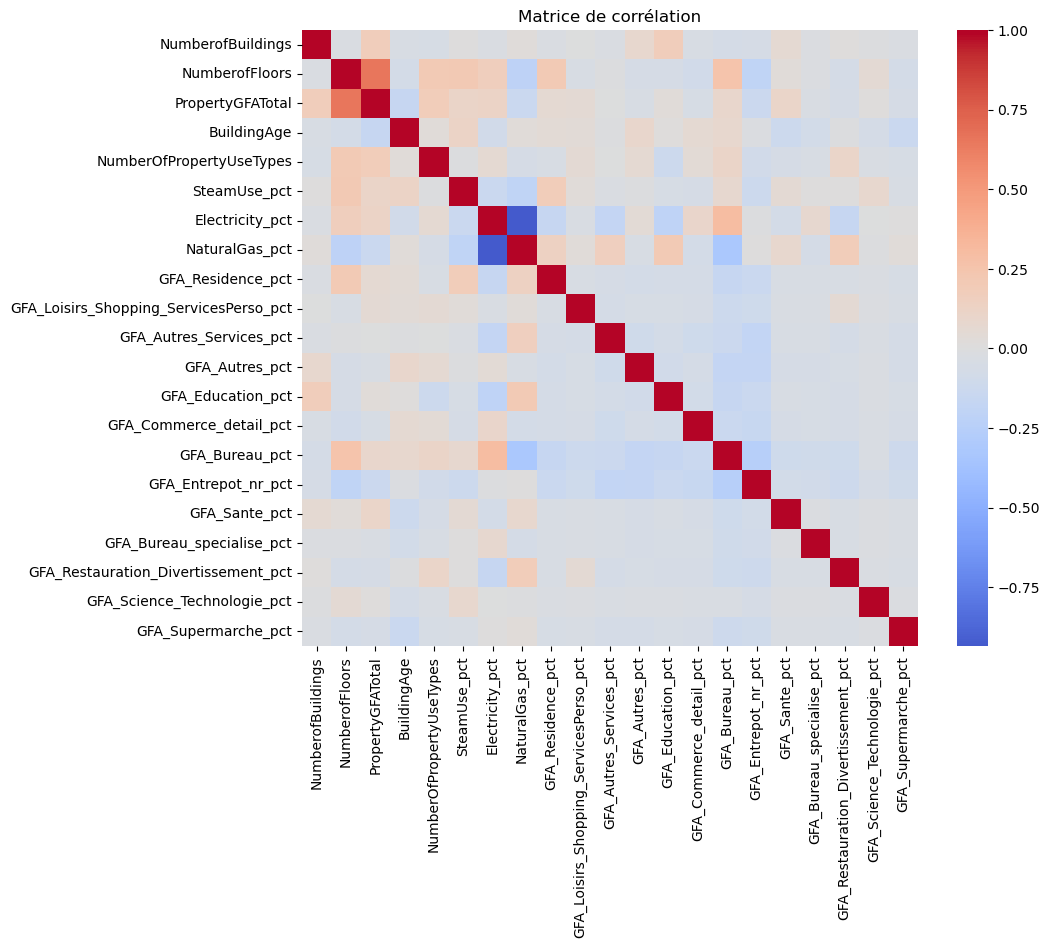

In [223]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

## Tests de modèles

### Data preparation

In [224]:
# Sélection des variables explicatives et des variables cibles
features = df.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore',
                   'GFA_Parking_pct'], axis=1)
target = df['Log_SiteEnergyUseWN']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [225]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

In [226]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((908, 21), (227, 21))

In [227]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 12 to 1126
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       908 non-null    float64
 1   NumberofFloors                          908 non-null    int64  
 2   PropertyGFATotal                        908 non-null    int64  
 3   BuildingAge                             908 non-null    int64  
 4   NumberOfPropertyUseTypes                908 non-null    int64  
 5   SteamUse_pct                            908 non-null    float64
 6   Electricity_pct                         908 non-null    float64
 7   NaturalGas_pct                          908 non-null    float64
 8   GFA_Residence_pct                       908 non-null    float64
 9   GFA_Loisirs_Shopping_ServicesPerso_pct  908 non-null    float64
 10  GFA_Autres_Services_pct                 908 non-null    float64
 

In [228]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12                 1.0               5             57452          109   
381                1.0               2            123000           50   
717                1.0               2             40657           19   
497                1.0               1             29740           55   
967                1.0               3             30408           36   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                          5     22.548591        47.793403       26.215991   
381                         2      0.000000       100.000000        0.000000   
717                         2      0.000000        96.960067        2.984884   
497                         2      0.000000        82.125234       13.557044   
967                         2      0.000000        98.006080        0.000000   

     GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
12                 0.0                                     0.0   
381                0.0                                     0.0   
717                0.0                                     0.0   
497                0.0                                     0.0   
967                0.0                                     0.0   

     GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
12                 28.618673       27.438557                0.0   
381                 0.000000        0.000000                0.0   
717                 0.000000        0.000000                0.0   
497                 0.000000        0.000000                0.0   
967               100.000000        0.000000                0.0   

     GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
12                       0.0       16.955023             0.000000   
381                      0.0       17.845118            82.154882   
717                      0.0      100.000000             0.000000   
497                      0.0       59.322937            40.677063   
967                      0.0        0.000000             0.000000   

     GFA_Sante_pct  GFA_Bureau_specialise_pct  \
12             0.0                        0.0   
381            0.0                        0.0   
717            0.0                        0.0   
497            0.0                        0.0   
967            0.0                        0.0   

     GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
12                             26.987746                          0.0   
381                             0.000000                          0.0   
717                             0.000000                          0.0   
497                             0.000000                          0.0   
967                             0.000000                          0.0   

     GFA_Supermarche_pct  
12                   0.0  
381                  0.0  
717                  0.0  
497                  0.0  
967                  0.0

### Standardisation

In [229]:
# Initialisation du StandardScaler
scaler = StandardScaler()

# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
12           -0.118616        0.180511         -0.242440     1.613289   
381          -0.118616       -0.316168          0.082463    -0.226839   
717          -0.118616       -0.316168         -0.325688    -1.193685   
497          -0.118616       -0.481728         -0.379800    -0.070896   
967          -0.118616       -0.150608         -0.376489    -0.663479   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
12                   2.696793      2.497745        -0.663238       -0.047874   
381                  0.142529     -0.222517         1.287912       -1.149670   
717                  0.142529     -0.222517         1.174299       -1.024222   
497                  0.142529     -0.222517         0.619867       -0.579900   
967                  0.142529     -0.222517         1.213392       -1.149670   

     GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
12           -0.254048                               -0.203361   
381          -0.254048                               -0.203361   
717          -0.254048                               -0.203361   
497          -0.254048                               -0.203361   
967          -0.254048                               -0.203361   

     GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
12                  0.814335        0.668120          -0.260516   
381                -0.363496       -0.398517          -0.260516   
717                -0.363496       -0.398517          -0.260516   
497                -0.363496       -0.398517          -0.260516   
967                 3.752106       -0.398517          -0.260516   

     GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
12                 -0.336123       -0.189155            -0.541168   
381                -0.336123       -0.164347             1.684559   
717                -0.336123        2.125451            -0.541168   
497                -0.336123        0.991711             0.560849   
967                -0.336123       -0.661721            -0.541168   

     GFA_Sante_pct  GFA_Bureau_specialise_pct  \
12       -0.162757                  -0.167941   
381      -0.162757                  -0.167941   
717      -0.162757                  -0.167941   
497      -0.162757                  -0.167941   
967      -0.162757                  -0.167941   

     GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
12                              1.458989                    -0.097666   
381                            -0.221555                    -0.097666   
717                            -0.221555                    -0.097666   
497                            -0.221555                    -0.097666   
967                            -0.221555                    -0.097666   

     GFA_Supermarche_pct  
12             -0.187021  
381            -0.187021  
717            -0.187021  
497            -0.187021  
967            -0.187021

### Test multi modèles

In [230]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [231]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

Modèle      RMSE       MAE        R2   RMSE CV     R2 CV  \
6   GradientBoostingReg  0.556543  0.432993  0.778049  0.562164  0.800023   
5          RandomForest  0.565114  0.438163  0.771160  0.595606  0.777334   
7            XGBoostReg  0.586868  0.453769  0.753203  0.623953  0.753292   
9           AdaBoostReg  0.644207  0.502388  0.702621  0.670720  0.717233   
8                   SVR  0.695099  0.545066  0.653780  0.714500  0.679838   
1      LinearRegression  0.792181  0.630172  0.550315  0.771614  0.627860   
2                 Ridge  0.793610  0.631469  0.548691  0.772161  0.627528   
4            ElasticNet  1.096742  0.891666  0.138078  1.170316  0.143892   
3                 Lasso  1.181363  0.946430 -0.000060  1.267186 -0.003853   
0  DummyRegressorMedian  1.189829  0.943303 -0.014445  1.275434 -0.016673   

   R2 CV Std  Temps de calcul  
6   0.028124         0.221059  
5   0.024089         0.698833  
7   0.036061         0.110531  
9   0.035219         0.090524  
8   0.022508         0.033008  
1   0.028224         0.001000  
2   0.029118         0.001000  
4   0.023746         0.001000  
3   0.004132         0.000000  
0   0.010097         0.001000

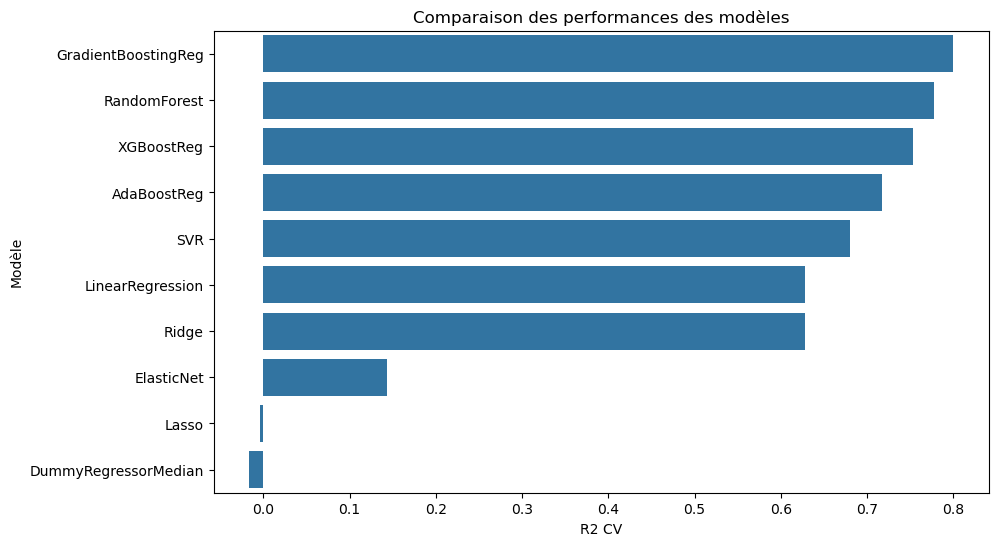

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles GradientBoostingReg affiche les meilleurs performances.

## Optimisation du GradientBoostingReg

### Le modèle de base

In [233]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("Métriques pour le modèle GBR :")
print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

Métriques pour le modèle GBR :
RMSE : 0.5566496032815438
R² : 0.7779640638669771
MAE : 0.4333711347211281


In [236]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=False)

print(features_gb)

                                   Feature  Importance
2                         PropertyGFATotal    0.682344
15                     GFA_Entrepot_nr_pct    0.102514
20                     GFA_Supermarche_pct    0.048725
7                           NaturalGas_pct    0.044171
3                              BuildingAge    0.021597
19             GFA_Science_Technologie_pct    0.019260
6                          Electricity_pct    0.018066
10                 GFA_Autres_Services_pct    0.015949
18     GFA_Restauration_Divertissement_pct    0.013046
16                           GFA_Sante_pct    0.010203
11                          GFA_Autres_pct    0.009306
1                           NumberofFloors    0.004123
13                 GFA_Commerce_detail_pct    0.003610
12                       GFA_Education_pct    0.001567
14                          GFA_Bureau_pct    0.001433
0                        NumberofBuildings    0.001137
5                             SteamUse_pct    0.001053
17        

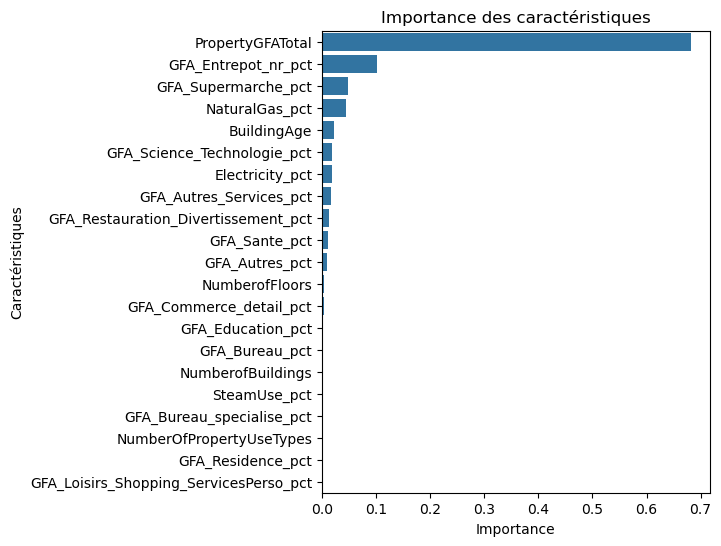

In [237]:
plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()

### Recherche des hyperparamètres

In [35]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR: ", random_search.best_params_)
meilleur_score_rmse_gbr = np.sqrt(-random_search.best_score_) 
print("Meilleur score (RMSE) pour GBR: ", meilleur_score_rmse_gbr)

Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR:  {'subsample': 0.3631578947368421, 'n_estimators': 410, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 3, 'learning_rate': 0.018105263157894735}
Meilleur score (RMSE) pour GBR:  0.5580986782822189


In [36]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.018, 0.028, 0.038],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [4, 6, 8],
    'n_estimators': [200, 300, 400],
    'subsample': [0.3, 0.5, 0.8]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour GBR: {:.4f}".format(rmse))
print("MAE avec GridSearchCV pour GBR: {:.4f}".format(mae))
print("R2 avec GridSearchCV pour GBR: {:.4f}".format(r2))
print("SMAPE avec GridSearchCV pour GBR: {:.4f}%".format(smape))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Meilleurs paramètres : {'learning_rate': 0.028, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 300, 'subsample': 0.3}
RMSE avec GridSearchCV pour GBR: 0.5541
MAE avec GridSearchCV pour GBR: 0.4355
R2 avec GridSearchCV pour GBR: 0.7800
SMAPE avec GridSearchCV pour GBR: 2.9763%


In [37]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_params = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmse_scores.mean():.4f} (± {rmse_scores.std():.4f})")
print(f"Validation Croisée MAE: {mae_scores.mean():.4f} (± {mae_scores.std():.4f})")
print(f"Validation Croisée R²: {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")

Validation Croisée RMSE: 0.5608 (± 0.0426)
Validation Croisée MAE: 0.4275 (± 0.0298)
Validation Croisée R²: 0.8021 (± 0.0244)


In [38]:
best_gb_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_gb_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_gb_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmse, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmse, test_r2, test_mae))

Ensemble d'entraînement : RMSE = 0.3929, R² = 0.9043, MAE = 0.3026
Ensemble de test : RMSE = 0.5513, R² = 0.7822, MAE = 0.4263


## Analyse des erreurs

### Avec les cibles en log

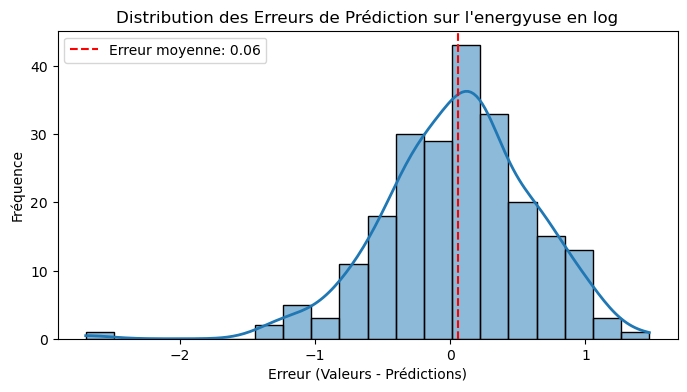

In [39]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

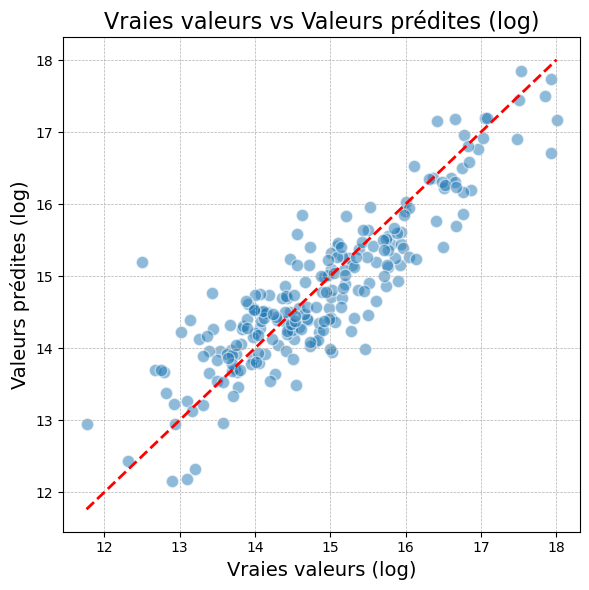

In [56]:
plt.figure(figsize=(6, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


### Avec les valeurs réelles

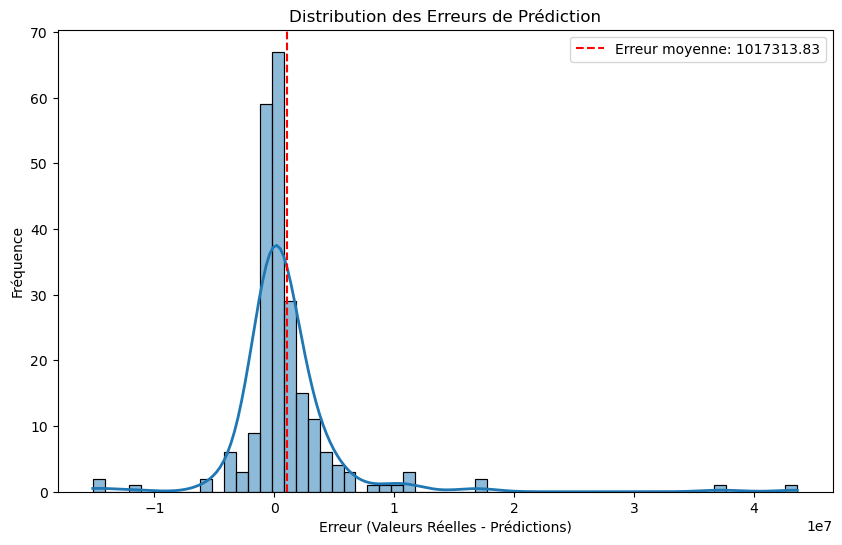

In [41]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], binwidth=1000000, line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

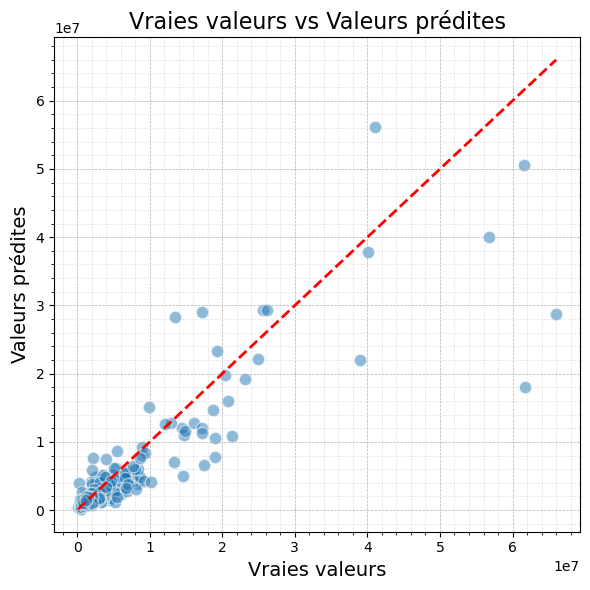

In [42]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [43]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

      Valeurs réelles  Valeurs prédites  Erreurs absolues
100        61674856.0      1.807286e+07      4.360200e+07
63         66000296.0      2.875424e+07      3.724606e+07
1107       38977108.0      2.203641e+07      1.694070e+07
296        56785916.0      4.003303e+07      1.675289e+07
1120       41078600.0      5.621813e+07      1.513953e+07
1018       13473994.0      2.836571e+07      1.489171e+07
298        17254810.0      2.897531e+07      1.172050e+07
351        19036416.0      7.733652e+06      1.130276e+07
128        61576184.0      5.053935e+07      1.103684e+07
231        17427156.0      6.579415e+06      1.084774e+07
333        21299472.0      1.088780e+07      1.041167e+07
363        14522162.0      4.935723e+06      9.586439e+06
388        19009360.0      1.052505e+07      8.484308e+06
306        13360349.0      7.044755e+06      6.315594e+06
525        10234721.0      4.162164e+06      6.072557e+06


In [44]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
100                 1.0              15            230880              NaN   
63                  1.0              11            299070              NaN   
1107                1.0               3            428347              NaN   
296                 1.0              42           1592914             97.0   
1120                1.0               6            345290              NaN   
1018                1.0               6            706176             82.0   
298                 1.0              10            422503             46.0   
351                 1.0              13            189175             13.0   
128                 1.0              63           1354987             89.0   
231                 1.0               1            104099              NaN   
333                 1.0               5            287224              NaN   
363                 1.0               4             99122              NaN   
388                 1.0               5            141718              NaN   
306                 3.0               2             81336              NaN   
525                 1.0               1             47105              NaN   

      SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
100              61674856.0             433.60           61   
63               66000296.0            2055.82           12   
1107             38977108.0            1280.81           91   
296              56785916.0             481.06           11   
1120             41078600.0            1000.06            1   
1018             13473994.0              92.52           16   
298              17254810.0             190.10           31   
351              19036416.0             132.71           95   
128              61576184.0             429.27           26   
231              17427156.0             142.36           63   
333              21299472.0             314.43            8   
363              14522162.0             179.45           72   
388              19009360.0             341.23           17   
306              13360349.0             270.17           22   
525              10234721.0             348.22           40   

      NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
100                          1      0.000000       100.000000        0.000000   
63                           1      0.000000        46.441677       52.553296   
1107                         1     34.779951        56.265380        3.939084   
296                          5      1.737056        97.073232        0.684205   
1120                         6      0.000000        57.540432       38.285891   
1018                         3      0.000000        98.491101        0.000000   
298                          1      5.761607        94.238383        0.000000   
351                          2      0.000000        99.999984        0.000000   
128                          2      0.000000        99.999994        0.000000   
231                          3      0.000000        97.673380        2.326620   
333                          4      0.000000        81.727387       17.068127   
363                          2      0.000000        87.907902       11.727579   
388                          2      0.000000        76.358538       23.641462   
306                          1      0.000000        68.911201       29.030072   
525                          1      0.000000        41.367517       58.632483   

      GFA_Parking_pct  GFA_Residence_pct  \
100          0.000000                0.0   
63          21.490302                0.0   
1107         0.000000                0.0   
296          0.000000                0.0   
1120        19.910502                0.0   
1018         0.000000                0.0   
298         48.894327                0.0   
351          0.000000                0.0   
128         10.438400                0.0   
231        

## Analyse des features

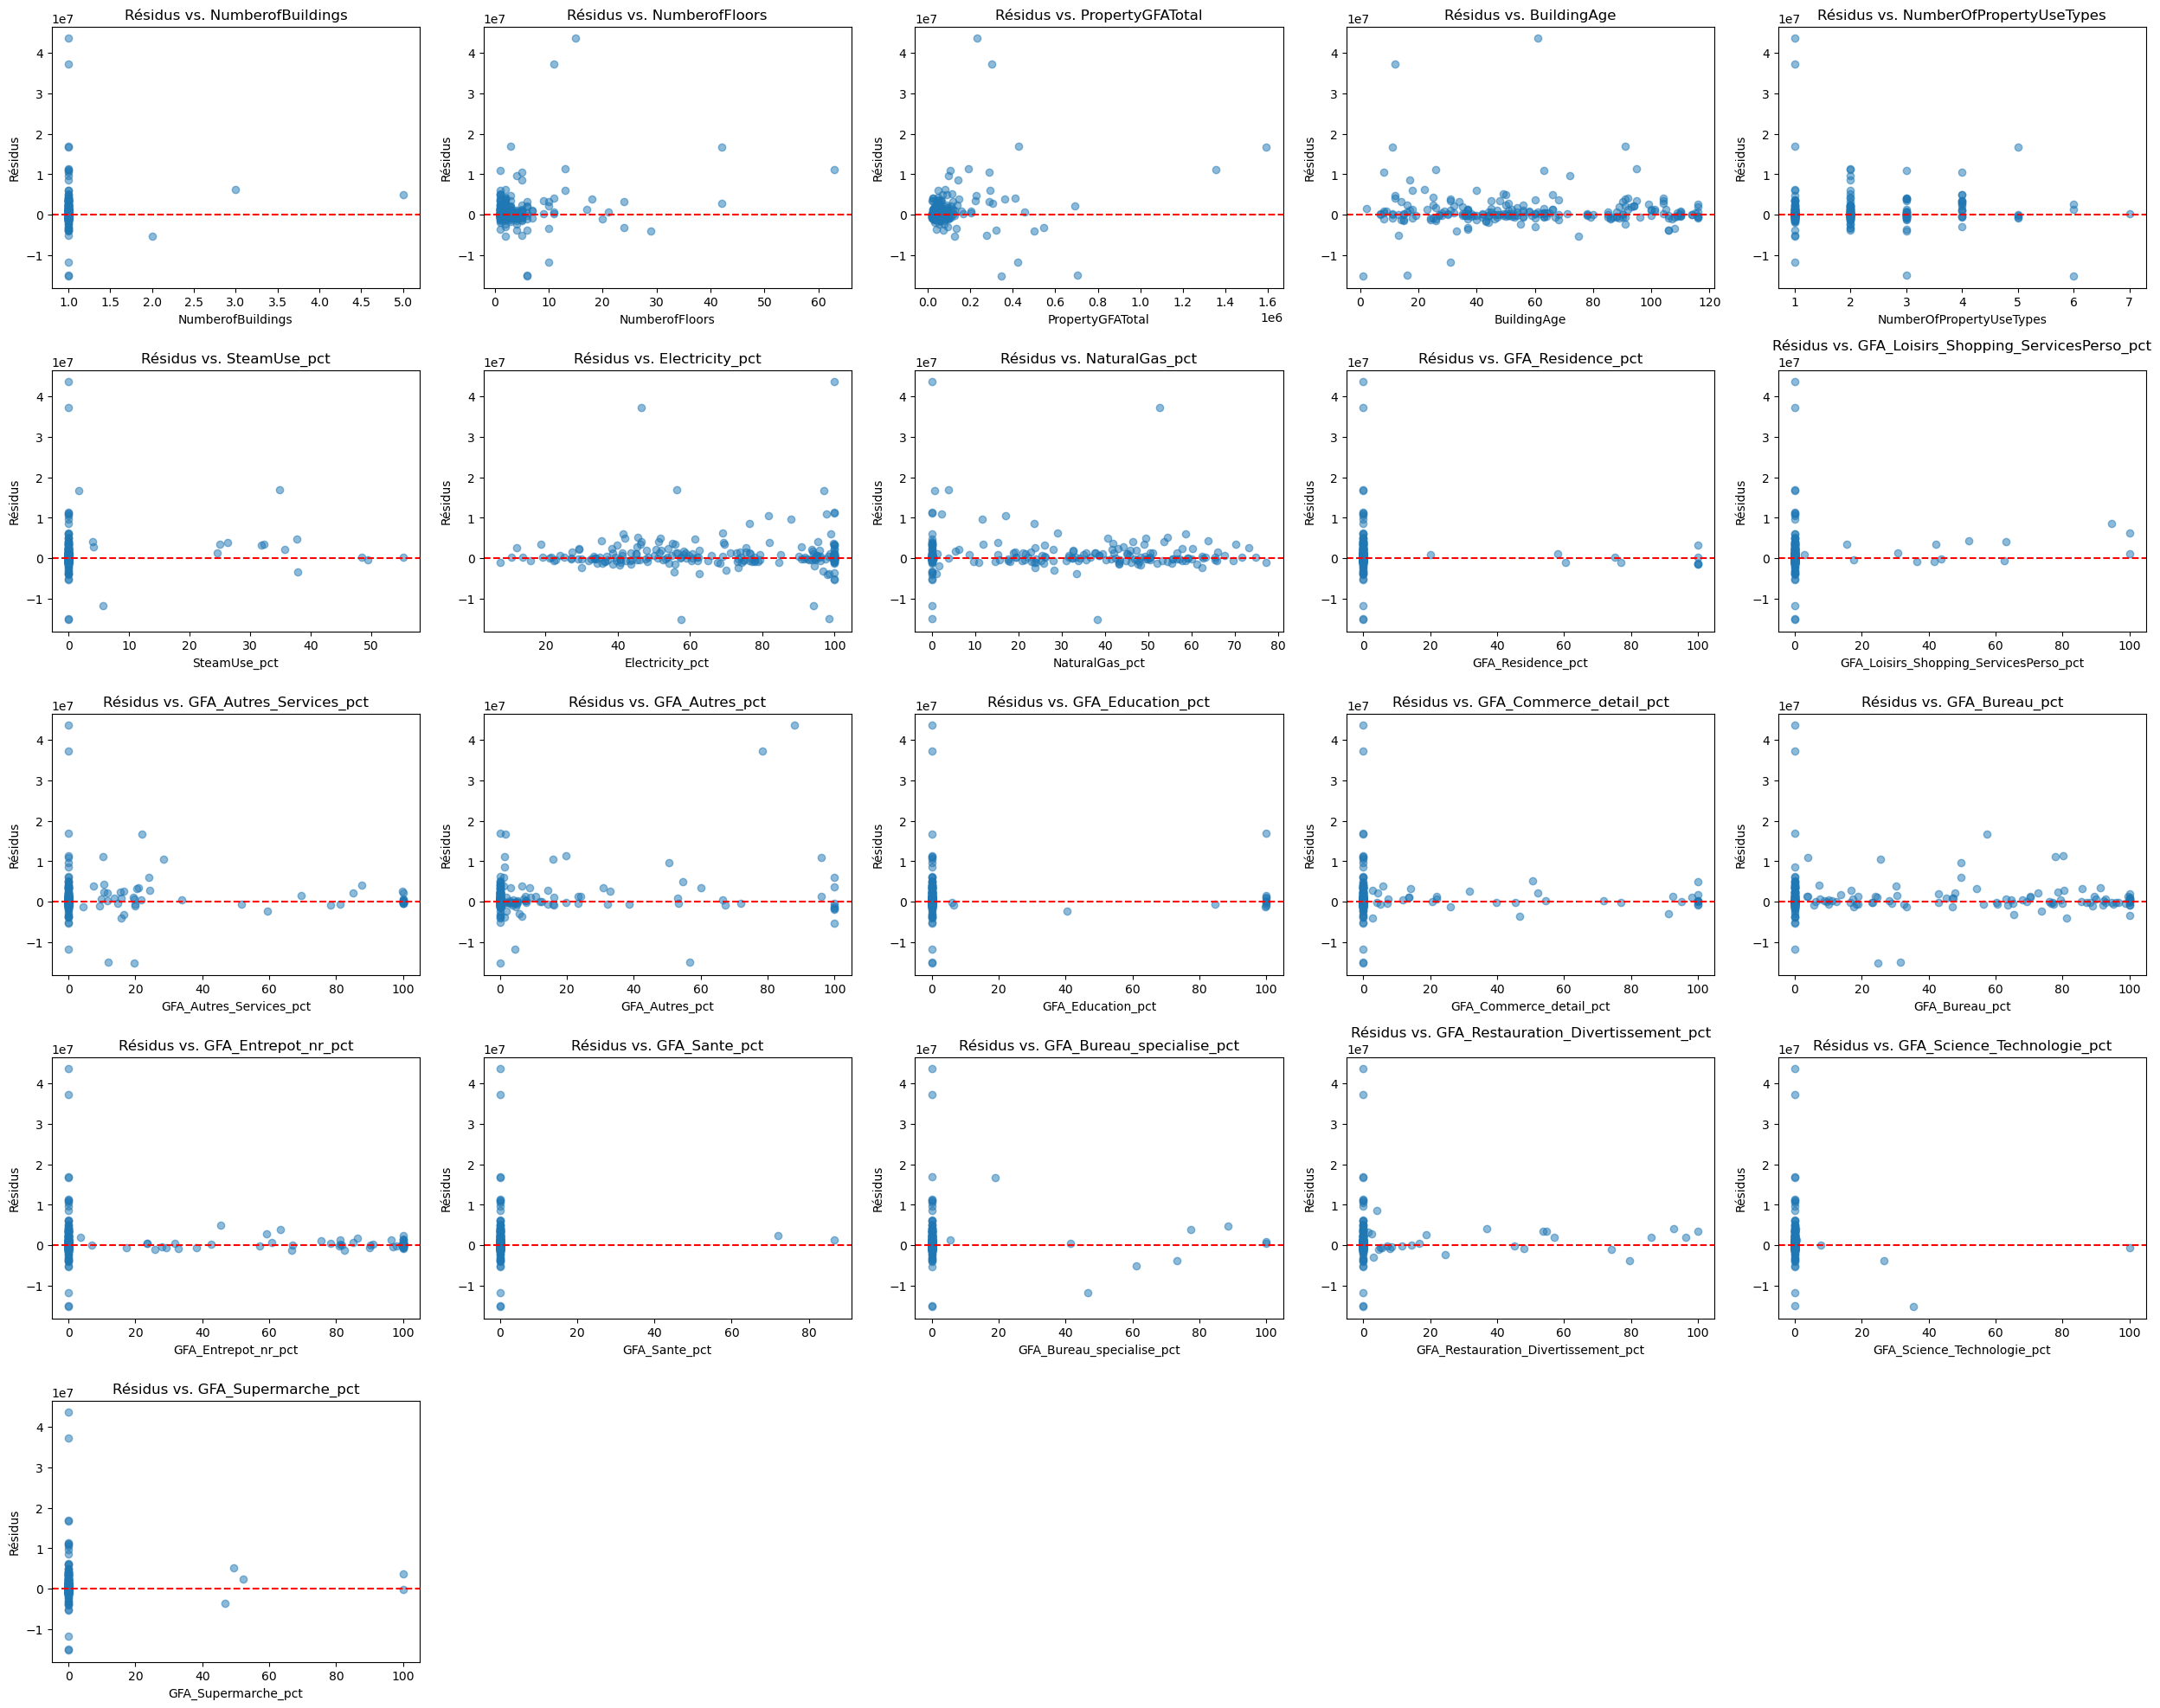

In [45]:
# Nombre de colonnes
n_cols = X_test.shape[1]

# Définir le nombre de graphiques par ligne
n_graph_par_ligne = 5

# Calculer le nombre total de lignes nécessaires
n_lignes = int(np.ceil(n_cols / n_graph_par_ligne)) 

# Figure pour les sous-graphiques
plt.figure(figsize=(n_graph_par_ligne * 5, n_lignes * 4))

for i, feature in enumerate(X_test.columns):
    plt.subplot(n_lignes, n_graph_par_ligne, i+1)
    plt.scatter(X_test[feature], errors, alpha=0.5)
    plt.title(f'Résidus vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Résidus')
    plt.axhline(y=0, color='r', linestyle='--')

# Ajuster
plt.tight_layout()
plt.show()


In [46]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(best_gb_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


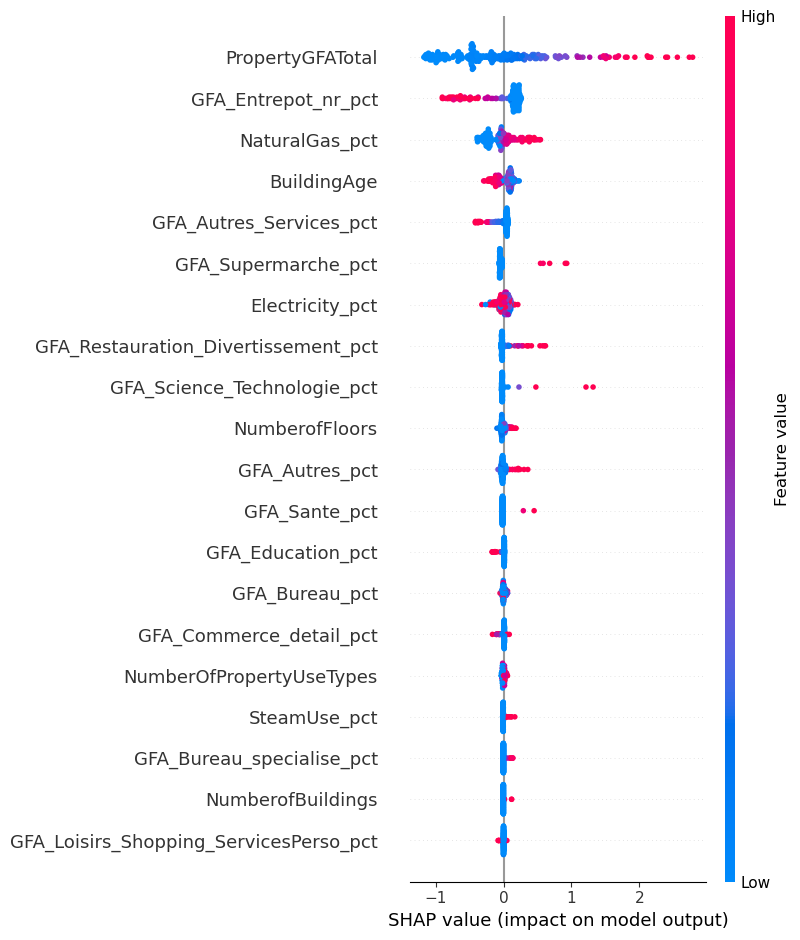

In [47]:
# Résumé de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

In [48]:
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df['prediction_error'] = y_test - y_test_pred  
shap_df.index = X_test.index

for feature in X_test.columns:
    non_zero_indices = X_test[feature] != 0
    non_zero_shap = shap_df[feature][non_zero_indices].dropna()
    non_zero_errors = shap_df['prediction_error'][non_zero_indices].dropna()

    # Assurez-vous que les séries ont des indices alignés et des valeurs non-NaN après le nettoyage
    common_indices = non_zero_shap.index.intersection(non_zero_errors.index)
    non_zero_shap = non_zero_shap.loc[common_indices]
    non_zero_errors = non_zero_errors.loc[common_indices]

    # Vérifiez que nous avons suffisamment de valeurs non nulles et non-NaN pour calculer la corrélation
    if len(non_zero_shap) > 1 and non_zero_shap.std() != 0:
        correlation = non_zero_shap.corr(non_zero_errors)
        print(f'Corrélation de la caractéristique {feature} avec l\'erreur de prédiction: {correlation}')
    elif non_zero_shap.std() == 0:
        print(f'La caractéristique {feature} a une variance nulle.')
    elif len(non_zero_shap) <= 1:
        print(f'Pas assez de données non nulles pour {feature}.')


Corrélation de la caractéristique NumberofBuildings avec l'erreur de prédiction: -0.0795150299106842
Corrélation de la caractéristique NumberofFloors avec l'erreur de prédiction: -0.05590488364689063
Corrélation de la caractéristique PropertyGFATotal avec l'erreur de prédiction: -0.11813985052402623
Corrélation de la caractéristique BuildingAge avec l'erreur de prédiction: -0.05593651451066292
Corrélation de la caractéristique NumberOfPropertyUseTypes avec l'erreur de prédiction: 0.12557569721974549
Corrélation de la caractéristique SteamUse_pct avec l'erreur de prédiction: -0.5149052900523773
Corrélation de la caractéristique Electricity_pct avec l'erreur de prédiction: 0.12908874807337326
Corrélation de la caractéristique NaturalGas_pct avec l'erreur de prédiction: 0.3720373179570256
Pas assez de données non nulles pour GFA_Residence_pct.
Corrélation de la caractéristique GFA_Loisirs_Shopping_ServicesPerso_pct avec l'erreur de prédiction: -1.0
Corrélation de la caractéristique GFA_Au

    Corrélations Négatives : lorsque la valeur de ces caractéristiques augmente, l'erreur de prédiction a tendance à diminuer (ou vice versa). 

    Corrélations Positives : lorsque la valeur de ces caractéristiques augmente, l'erreur de prédiction a tendance à augmentater l'erreur de prédiction. 
    
    Variance Nulle ou Données Insuffisantes : Plusieurs caractéristiques montrent une absence de données suffisantes pour calculer la corrélation ou une variance nulle ce qui indique que ces caractéristiques peuvent ne pas varier suffisamment dans l'ensemble de données ou sont majoritairement nulles, limitant leur utilité dans le modèle.

Implications :

    Les caractéristiques avec des corrélations significatives (positives ou négatives) peuvent nécessiter une attention particulière pour comprendre leur impact sur le modèle. Par exemple, des caractéristiques avec une forte corrélation négative pourraient être des indicateurs clés de réduction d'erreur, tandis que celles avec une corrélation positive pourraient indiquer des domaines où le modèle sur-estime ou sous-estime systématiquement.

    Les caractéristiques avec une variance nulle ou un manque de données non nulles peuvent nécessiter une réévaluation quant à leur inclusion dans le modèle. Il peut être utile d'examiner si ces caractéristiques sont pertinentes ou si elles doivent être transformées ou remplacées par d'autres indicateurs plus informatifs.

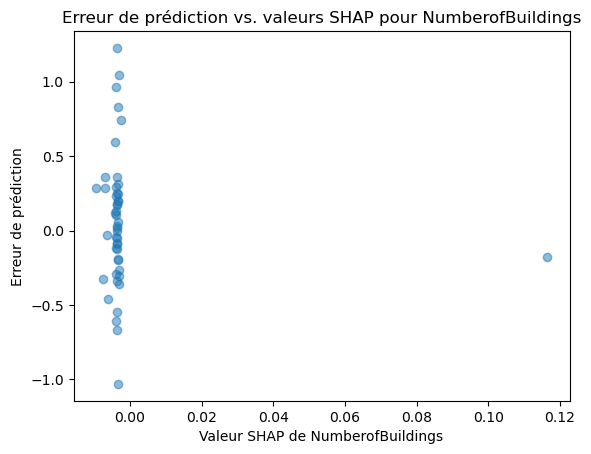

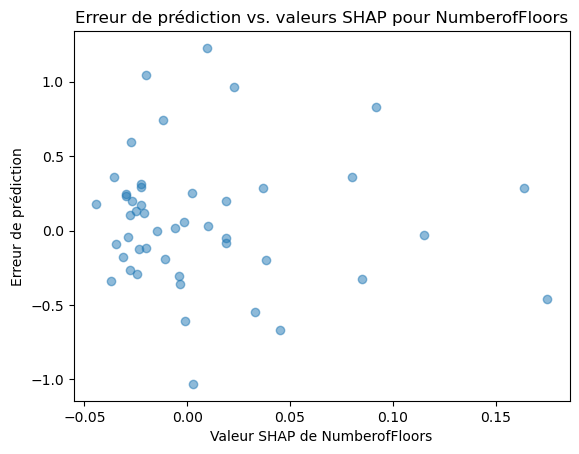

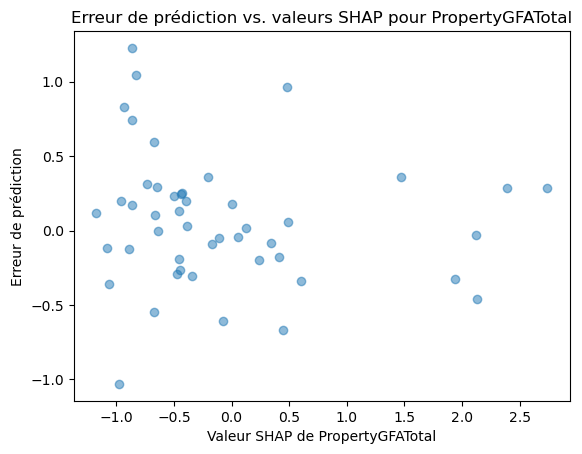

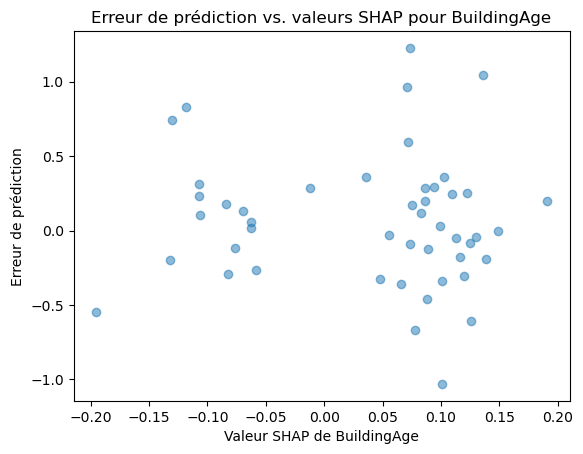

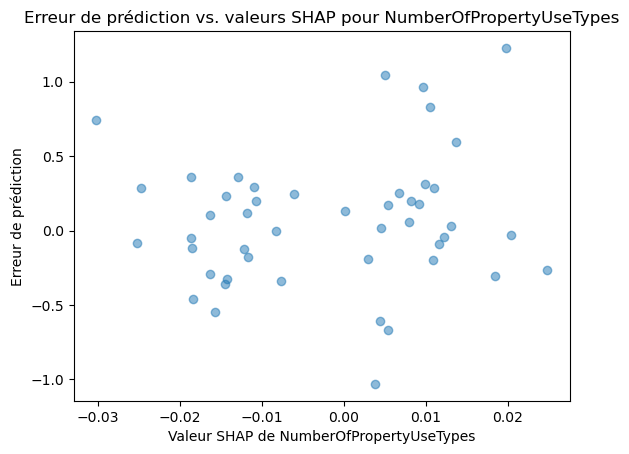

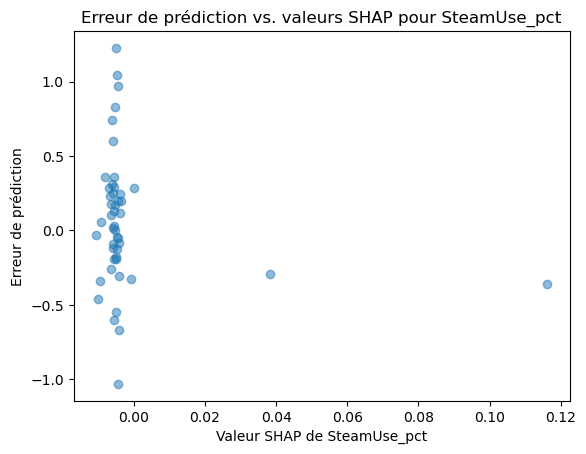

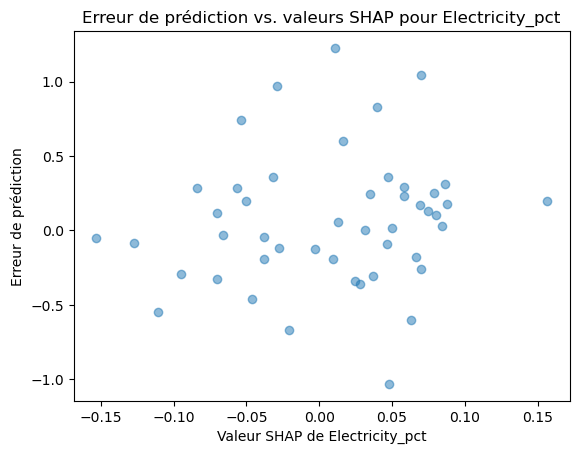

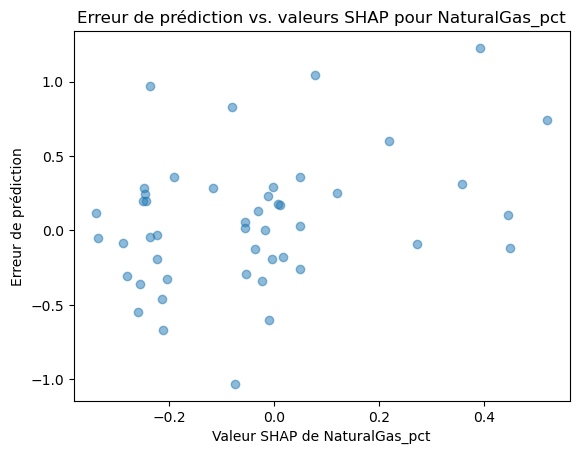

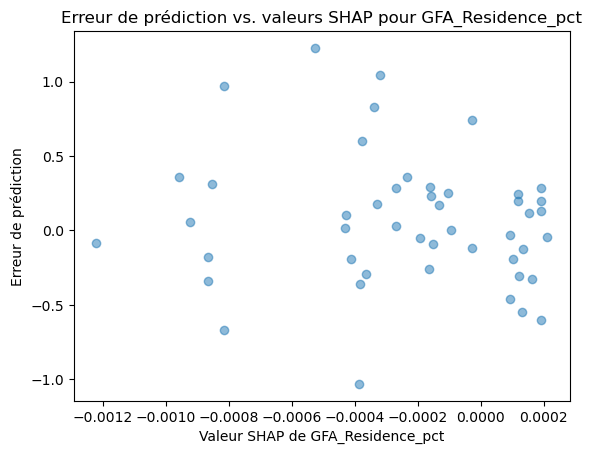

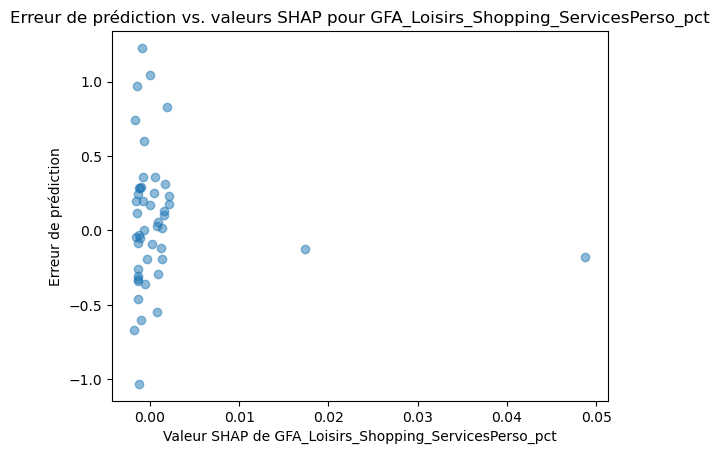

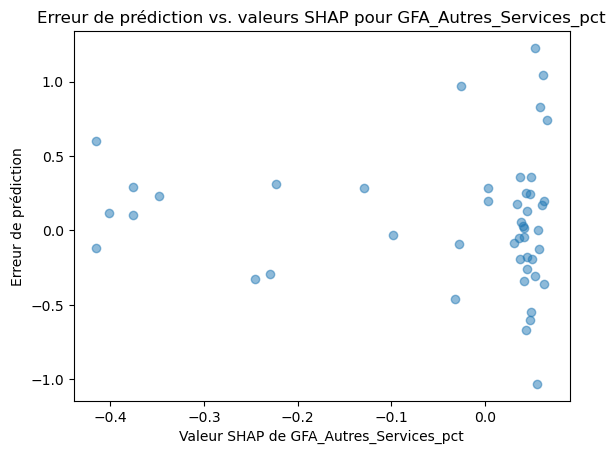

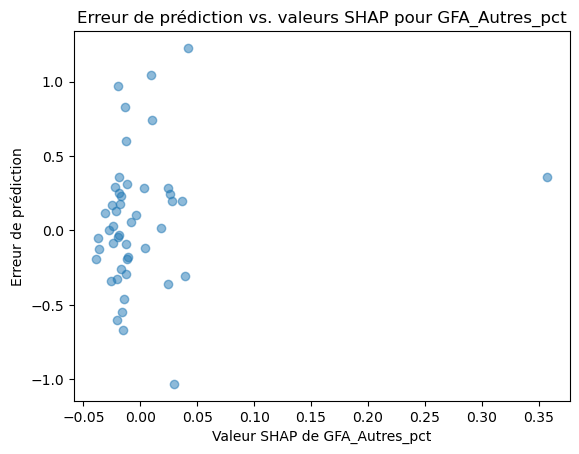

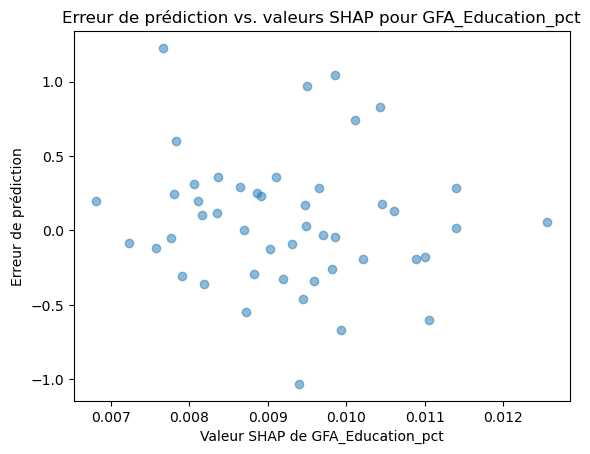

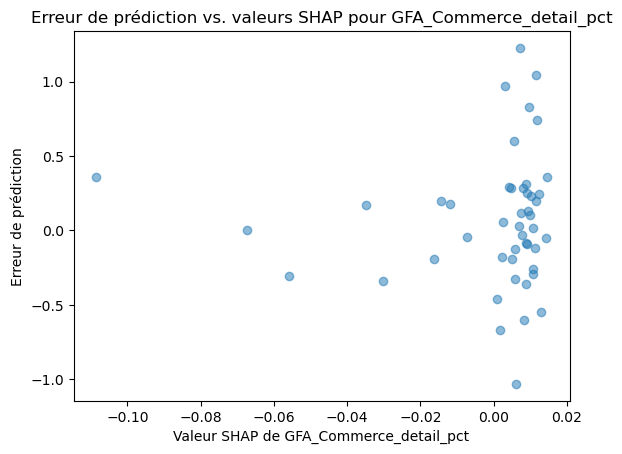

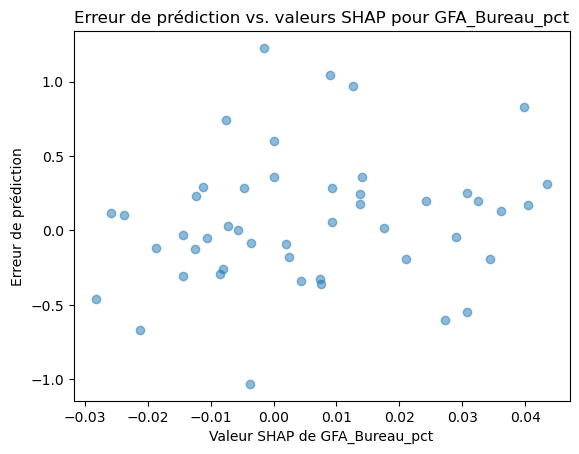

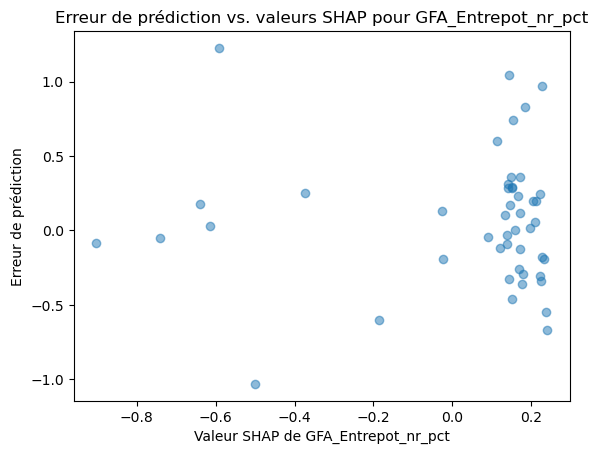

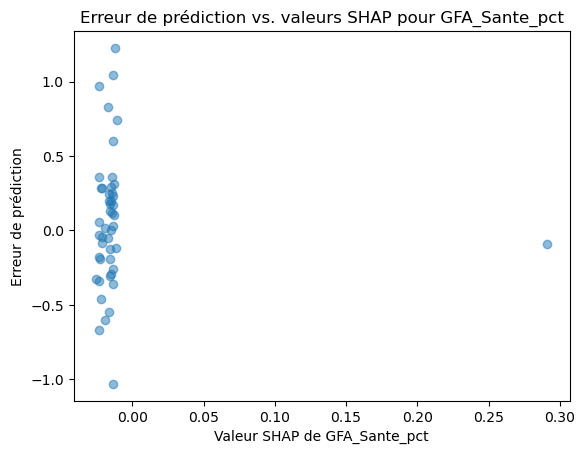

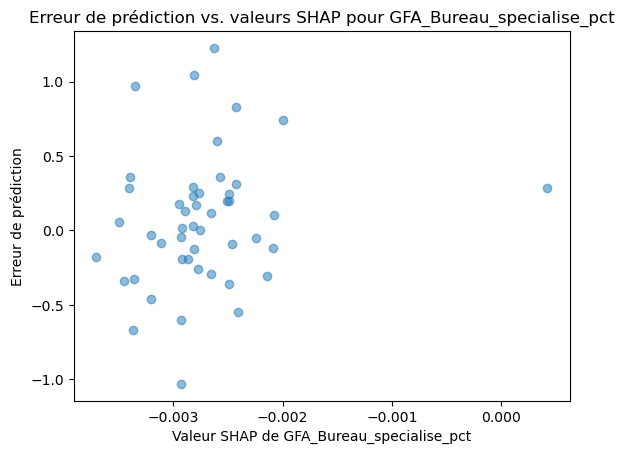

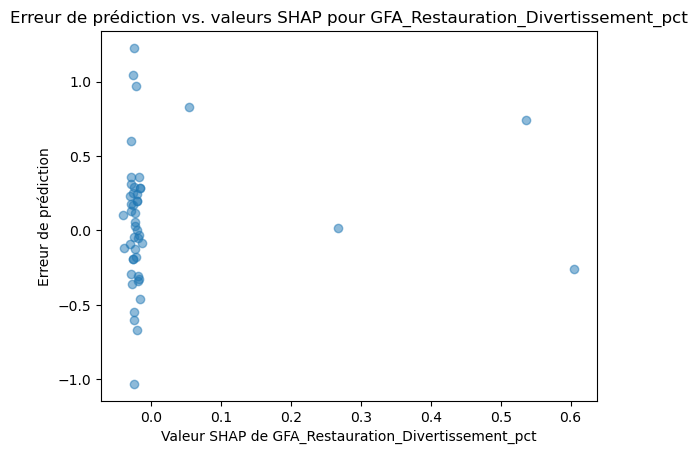

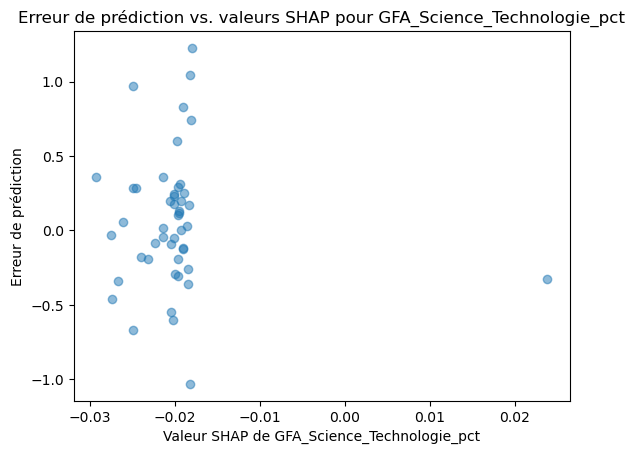

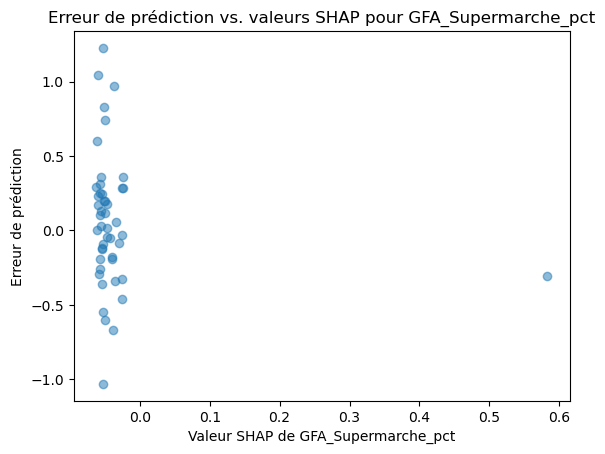

In [49]:
for feature in X_test.columns:
    plt.figure()
    plt.scatter(shap_df[feature], shap_df['prediction_error'], alpha=0.5)
    plt.title(f'Erreur de prédiction vs. valeurs SHAP pour {feature}')
    plt.xlabel(f'Valeur SHAP de {feature}')
    plt.ylabel('Erreur de prédiction')
    plt.show()


In [50]:
# Colonne pour indiquer si l'erreur est positive ou négative
shap_df['error_sign'] = np.sign(shap_df['prediction_error'])

# Calculer la moyenne des valeurs SHAP pour les erreurs positives et négatives
mean_shap_positive_error = shap_df[shap_df['error_sign'] > 0].mean()
mean_shap_negative_error = shap_df[shap_df['error_sign'] < 0].mean()

# Afficher les moyennes pour chaque caractéristique
print("Moyenne des valeurs SHAP pour les erreurs positives:")
print(mean_shap_positive_error)
print("\nMoyenne des valeurs SHAP pour les erreurs négatives:")
print(mean_shap_negative_error)


Moyenne des valeurs SHAP pour les erreurs positives:
NumberofBuildings                        -0.004099
NumberofFloors                            0.001860
PropertyGFATotal                         -0.189506
BuildingAge                               0.027850
NumberOfPropertyUseTypes                 -0.001188
SteamUse_pct                             -0.005504
Electricity_pct                           0.029654
NaturalGas_pct                            0.004701
GFA_Residence_pct                        -0.000261
GFA_Loisirs_Shopping_ServicesPerso_pct    0.000017
GFA_Autres_Services_pct                  -0.057429
GFA_Autres_pct                            0.010131
GFA_Education_pct                         0.009242
GFA_Commerce_detail_pct                  -0.002190
GFA_Bureau_pct                            0.009511
GFA_Entrepot_nr_pct                       0.049995
GFA_Sante_pct                            -0.016090
GFA_Bureau_specialise_pct                -0.002632
GFA_Restauration_Divertisseme

In [51]:
for feature in X_test.columns:
    # Identifier les instances avec les valeurs SHAP les plus élevées pour la caractéristique
    high_shap_values = shap_df[feature].nlargest(10)  # les 10 valeurs SHAP les plus élevées
    high_shap_indices = high_shap_values.index  # obtenir les indices de ces valeurs
    high_shap_observations = X_test.loc[high_shap_indices]  # obtenir les observations correspondantes
    print(f'Observations avec les valeurs SHAP les plus élevées pour {feature}:')
    print(high_shap_observations)


Observations avec les valeurs SHAP les plus élevées pour NumberofBuildings:
      NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
1083                5.0               1             87458           50   
306                 3.0               2             81336           22   
275                 2.0               2            125519           75   
1128                1.0               1             23445          104   
298                 1.0              10            422503           31   
597                 1.0               2             25380          104   
616                 1.0               3             31191           89   
1069                1.0               2             42000           31   
853                 1.0               1             20975           79   
490                 1.0               1             39350           37   

      NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
1083                        

In [52]:
# Chargez la bibliothèque JavaScript SHAP pour Jupyter Notebook
shap.initjs()

# Ensuite, créez le force plot pour le premier échantillon
shap.force_plot(
    explainer.expected_value, shap_values[0,:], X_test.iloc[100,:],
    feature_names=X_test.columns
)


In [53]:
# Sur l'ensemble
shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=X_test.columns)


In [54]:
# Calculer les valeurs SHAP pour l'ensemble de test
shap_values = explainer.shap_values(X_test)

top_errors_indices = df_errors_sorted.head(15).index
indices_numériques = [X_test.index.get_loc(ind) for ind in top_errors_indices if ind in X_test.index]

# Sélectionnez le sous-ensemble des valeurs SHAP pour ces indices numériques
shap_values_subset = shap_values[indices_numériques]

# Maintenant, sélectionnez les observations correspondantes dans X_test_scaled
X_test_subset = X_test.loc[top_errors_indices]

# Affichage du force plot pour le sous-ensemble sélectionné
shap.force_plot(explainer.expected_value, shap_values_subset, X_test_subset)


# Analyse de l'influance de l'Energy Star Score

## Test avec l'Energy Star Score

In [358]:
# Sélection des données
df_nrjstar = df.dropna(subset=['ENERGYSTARScore'])
df_nrjstar.shape

(725, 27)

### Importance des features

#### Data preparation

In [359]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN'], axis=1)
target = df_nrjstar['Log_SiteEnergyUseWN']

In [360]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12             88434             60.0   

   BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
0           89                         1      26.87282        52.917723   

   NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
0        17.11772              0.0              100.0   

   GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
0                                     0.0                      0.0   

   GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  GFA_Bureau_pct  \
0             0.0                0.0                      0.0             0.0   

   GFA_Entrepot_nr_pct  GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0                  0.0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

#### Séparation des données

In [361]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 23), (145, 23))

In [362]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   ENERGYSTARScore                         580 non-null    float64
 4   BuildingAge                             580 non-null    int64  
 5   NumberOfPropertyUseTypes                580 non-null    int64  
 6   SteamUse_pct                            580 non-null    float64
 7   Electricity_pct                         580 non-null    float64
 8   NaturalGas_pct                          580 non-null    float64
 9   GFA_Parking_pct                         580 non-null    float64
 10  GFA_Residence_pct                       580 non-null    float64
 

In [363]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638                1.0               3             39927             38.0   
7                  1.0              11            153163             30.0   
606                1.0               2             21128             97.0   
889                1.0               2             21200             15.0   
580                1.0               1             36444             80.0   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638           42                         2      0.000000        93.117487   
7             47                         1     31.460248        37.169778   
606           57                         1      0.000000        99.999979   
889           18                         2      0.000000       100.000000   
580           56                         1      0.000000        95.188896   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638        0.000000         0.000000           0.000000   
7         27.583765        12.587244          87.412756   
606        0.000000         0.000000           0.000000   
889        0.000000         0.000000           0.000000   
580        0.000000         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

In [364]:
y_train.head()

638    15.158941
7      16.627736
606    12.986782
889    14.318075
580    12.040396
Name: Log_SiteEnergyUseWN, dtype: float64

#### Standardisation

In [365]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [366]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638          -0.088885       -0.208439         -0.361989        -0.917038   
7            -0.088885        1.081104          0.228270        -1.202689   
606          -0.088885       -0.369632         -0.459982         1.189638   
889          -0.088885       -0.369632         -0.459607        -1.738285   
580          -0.088885       -0.530825         -0.380145         0.582629   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638    -0.451947                  0.517505     -0.234397         0.924016   
7      -0.292093                 -0.722797      3.420266        -1.120001   
606     0.027616                 -0.722797     -0.234397         1.175463   
889    -1.219248                  0.517505     -0.234397         1.175464   
580    -0.004355                 -0.722797     -0.234397         0.999693   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638       -1.052039        -0.359810          -0.281954   
7          0.107293         1.017538           3.546663   
606       -1.052039        -0.359810          -0.281954   
889       -1.052039        -0.359810          -0.281954   
580       -1.052039        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test de Student

In [367]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.721
Model:                             OLS   Adj. R-squared:                  0.710
Method:                  Least Squares   F-statistic:                     62.61
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):          7.72e-138
Time:                         11:56:25   Log-Likelihood:                -563.56
No. Observations:                  580   AIC:                             1175.
Df Residuals:                      556   BIC:                             1280.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

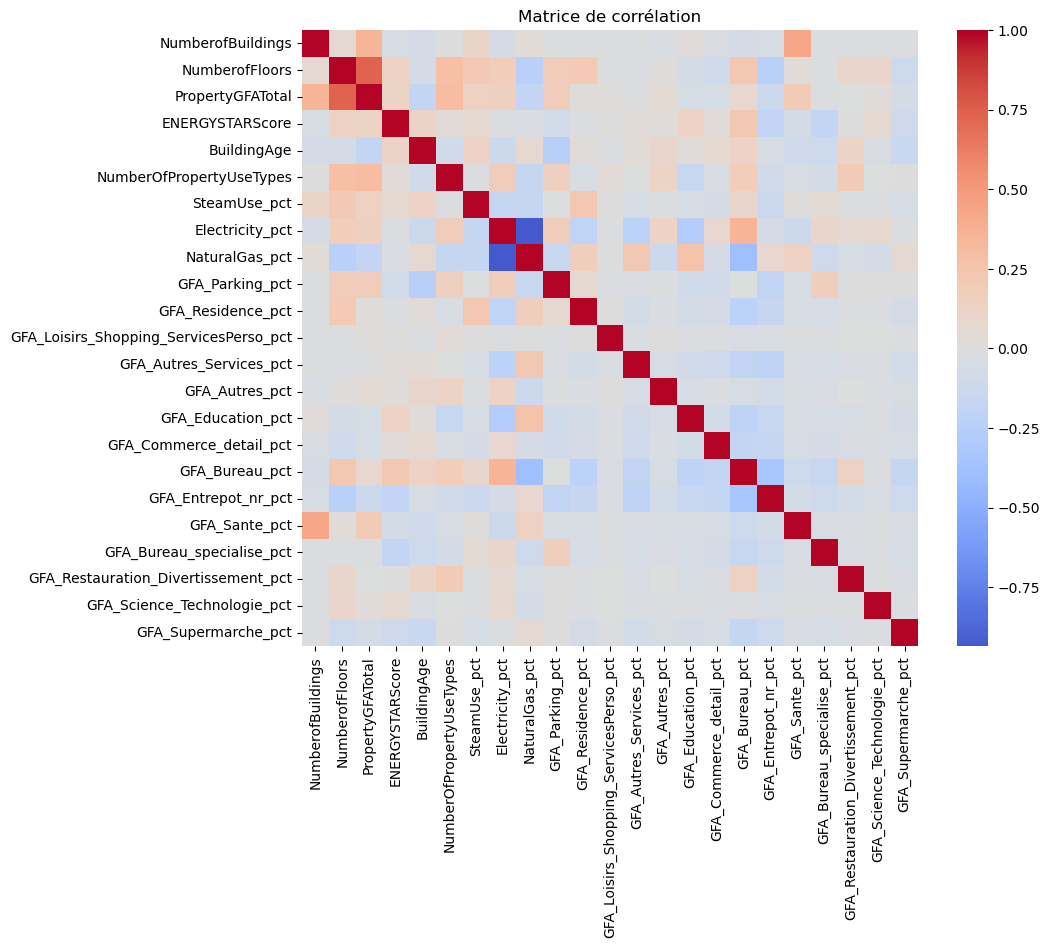

In [368]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

### Tests de modèles

#### Data preparation

In [369]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN'], axis=1)
target = df_nrjstar['Log_SiteEnergyUseWN']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [370]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0                1.0              12             88434             60.0   

   BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
0           89                         1      26.87282        52.917723   

   NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
0        17.11772              0.0              100.0   

   GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
0                                     0.0                      0.0   

   GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  GFA_Bureau_pct  \
0             0.0                0.0                      0.0             0.0   

   GFA_Entrepot_nr_pct  GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0                  0.0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

In [371]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 23), (145, 23))

In [372]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   ENERGYSTARScore                         580 non-null    float64
 4   BuildingAge                             580 non-null    int64  
 5   NumberOfPropertyUseTypes                580 non-null    int64  
 6   SteamUse_pct                            580 non-null    float64
 7   Electricity_pct                         580 non-null    float64
 8   NaturalGas_pct                          580 non-null    float64
 9   GFA_Parking_pct                         580 non-null    float64
 10  GFA_Residence_pct                       580 non-null    float64
 

In [373]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638                1.0               3             39927             38.0   
7                  1.0              11            153163             30.0   
606                1.0               2             21128             97.0   
889                1.0               2             21200             15.0   
580                1.0               1             36444             80.0   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638           42                         2      0.000000        93.117487   
7             47                         1     31.460248        37.169778   
606           57                         1      0.000000        99.999979   
889           18                         2      0.000000       100.000000   
580           56                         1      0.000000        95.188896   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638        0.000000         0.000000           0.000000   
7         27.583765        12.587244          87.412756   
606        0.000000         0.000000           0.000000   
889        0.000000         0.000000           0.000000   
580        0.000000         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

#### Standardisation

In [374]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [375]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
638          -0.088885       -0.208439         -0.361989        -0.917038   
7            -0.088885        1.081104          0.228270        -1.202689   
606          -0.088885       -0.369632         -0.459982         1.189638   
889          -0.088885       -0.369632         -0.459607        -1.738285   
580          -0.088885       -0.530825         -0.380145         0.582629   

     BuildingAge  NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  \
638    -0.451947                  0.517505     -0.234397         0.924016   
7      -0.292093                 -0.722797      3.420266        -1.120001   
606     0.027616                 -0.722797     -0.234397         1.175463   
889    -1.219248                  0.517505     -0.234397         1.175464   
580    -0.004355                 -0.722797     -0.234397         0.999693   

     NaturalGas_pct  GFA_Parking_pct  GFA_Residence_pct  \
638       -1.052039        -0.359810          -0.281954   
7          0.107293         1.017538           3.546663   
606       -1.052039        -0.359810          -0.281954   
889       -1.052039        -0.359810          -0.281954   
580       -1.052039        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test multi modèles

In [376]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [377]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

Modèle      RMSE       MAE        R2   RMSE CV     R2 CV  \
6   GradientBoostingReg  0.348530  0.271974  0.927034  0.385494  0.896611   
5          RandomForest  0.398824  0.315938  0.904456  0.435419  0.867280   
7            XGBoostReg  0.422693  0.327910  0.892678  0.443773  0.863204   
9           AdaBoostReg  0.497358  0.387736  0.851414  0.516564  0.814796   
8                   SVR  0.558143  0.431531  0.812876  0.617233  0.733371   
2                 Ridge  0.659636  0.512839  0.738635  0.700374  0.657703   
1      LinearRegression  0.657068  0.510338  0.740666  0.702250  0.655554   
4            ElasticNet  1.136570  0.946616  0.224054  1.107633  0.150978   
3                 Lasso  1.299643  1.050432 -0.014582  1.214297 -0.020744   
0  DummyRegressorMedian  1.321536  1.055894 -0.049052  1.220916 -0.031148   

   R2 CV Std  Temps de calcul  
6   0.017981         0.157830  
5   0.026931         0.473619  
7   0.019208         0.086038  
9   0.019079         0.078430  
8   0.041183         0.012003  
2   0.061533         0.000000  
1   0.066009         0.001000  
4   0.016961         0.001000  
3   0.023509         0.001000  
0   0.026867         0.001000

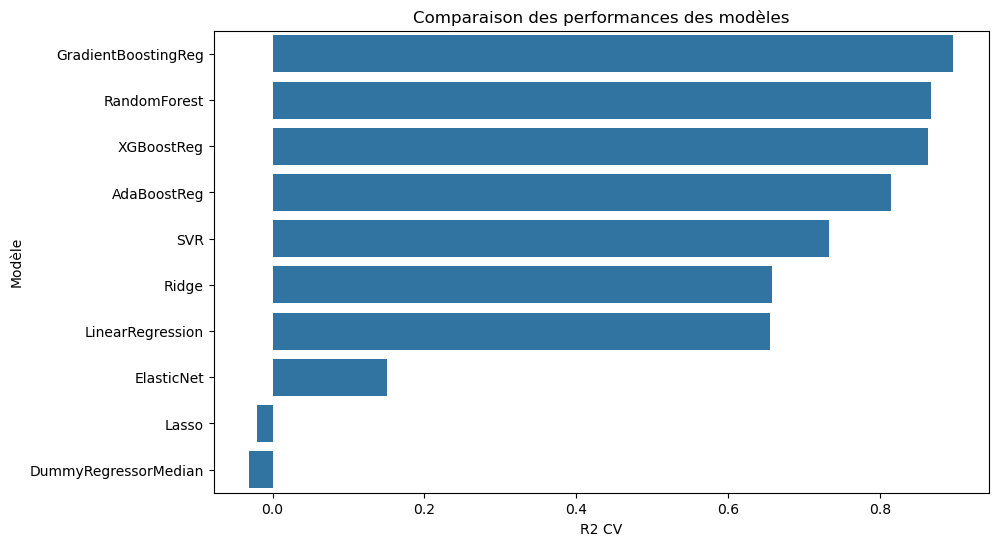

In [378]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles Gradient Boosting Regressor est supérieur aux autres si on regarde le R² avec CV.

### Optimisation du GradientBoostingReg

#### Le modèle de base

In [379]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("Métriques pour le modèle GBR :")
print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

Métriques pour le modèle GBR :
RMSE : 0.3478472517398744
R² : 0.9273197770221515
MAE : 0.2714681303047819


In [380]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=False)

print(features_gb)

                                   Feature  Importance
2                         PropertyGFATotal    0.682878
17                     GFA_Entrepot_nr_pct    0.089391
3                          ENERGYSTARScore    0.071303
22                     GFA_Supermarche_pct    0.057641
21             GFA_Science_Technologie_pct    0.019401
8                           NaturalGas_pct    0.019099
7                          Electricity_pct    0.013899
12                 GFA_Autres_Services_pct    0.011752
0                        NumberofBuildings    0.008980
1                           NumberofFloors    0.007521
4                              BuildingAge    0.005322
18                           GFA_Sante_pct    0.002934
15                 GFA_Commerce_detail_pct    0.002510
9                          GFA_Parking_pct    0.002245
16                          GFA_Bureau_pct    0.001729
6                             SteamUse_pct    0.001425
13                          GFA_Autres_pct    0.001271
5         

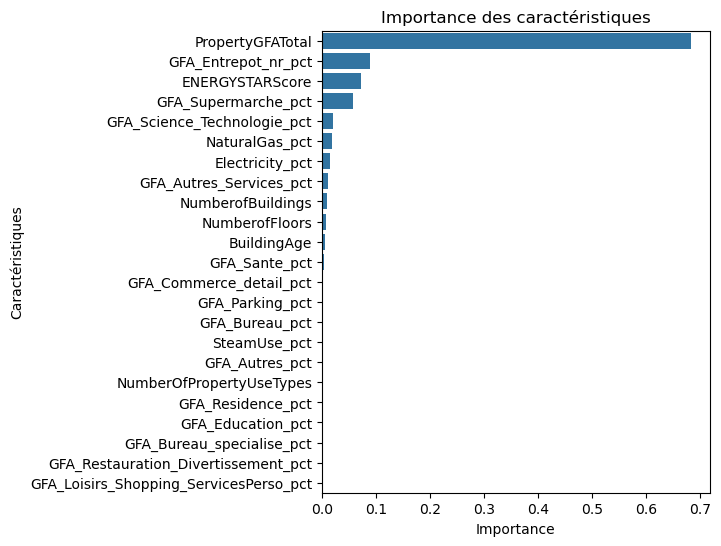

In [381]:
plt.figure(figsize=(5,6))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()

#### Recherche des hyperparamètres

In [382]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR: ", random_search.best_params_)
meilleur_score_rmse_bgr = np.sqrt(-random_search.best_score_) 
print("Meilleur score (RMSE) pour GBR: ", meilleur_score_rmse_bgr)

Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR:  {'subsample': 0.8052631578947369, 'n_estimators': 320, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 2, 'learning_rate': 0.08884210526315789}
Meilleur score (RMSE) pour GBR:  0.355179445062484


{'subsample': 0.6473684210526316, 'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.1191578947368421}
Meilleur score (RMSE) pour GBR:  0.3557881677260836

{'subsample': 0.7421052631578948, 'n_estimators': 330, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.08884210526315789}
Meilleur score (RMSE) pour GBR:  0.3522277696313604

{'subsample': 0.8052631578947369, 'n_estimators': 440, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 2, 'learning_rate': 0.08884210526315789}
Meilleur score (RMSE) pour GBR:  0.35221255413268704

In [383]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.08, 0.09],
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [3, 4],
    'n_estimators': [340, 440, 540],
    'subsample': [0.7, 0.8]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour GBR: {:.4f}".format(rmse))
print("MAE avec GridSearchCV pour GBR: {:.4f}".format(mae))
print("R2 avec GridSearchCV pour GBR: {:.4f}".format(r2))
print("SMAPE avec GridSearchCV pour GBR: {:.4f}%".format(smape))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Meilleurs paramètres : {'learning_rate': 0.08, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 440, 'subsample': 0.8}
RMSE avec GridSearchCV pour GBR: 0.3253
MAE avec GridSearchCV pour GBR: 0.2470
R2 avec GridSearchCV pour GBR: 0.9364
SMAPE avec GridSearchCV pour GBR: 1.6715%


In [384]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_params = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']
mae_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmse_scores.mean():.4f} (± {rmse_scores.std():.4f})")
print(f"Validation Croisée MAE: {mae_scores.mean():.4f} (± {mae_scores.std():.4f})")
print(f"Validation Croisée R²: {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")

Validation Croisée RMSE: 0.3478 (± 0.0413)
Validation Croisée MAE: 0.2447 (± 0.0162)
Validation Croisée R²: 0.9159 (± 0.0150)


In [385]:
best_gb_model.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_pred = best_gb_model.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_pred = best_gb_model.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmse, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmse, test_r2, test_mae))

Ensemble d'entraînement : RMSE = 0.1677, R² = 0.9808, MAE = 0.1269
Ensemble de test : RMSE = 0.3180, R² = 0.9393, MAE = 0.2459


### Analyse des erreurs

#### Avec les cibles en log

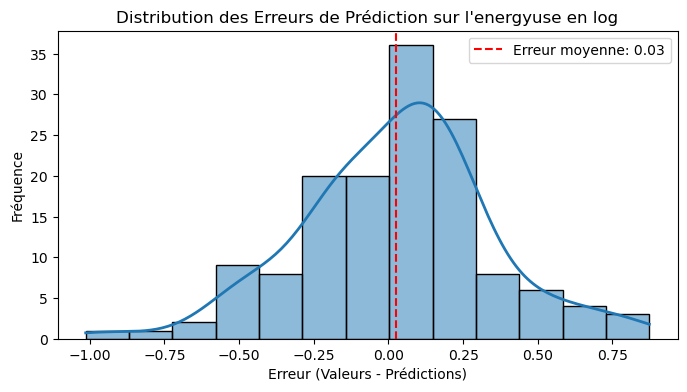

In [386]:
# Calcul des erreurs
errors = y_test - y_test_pred

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

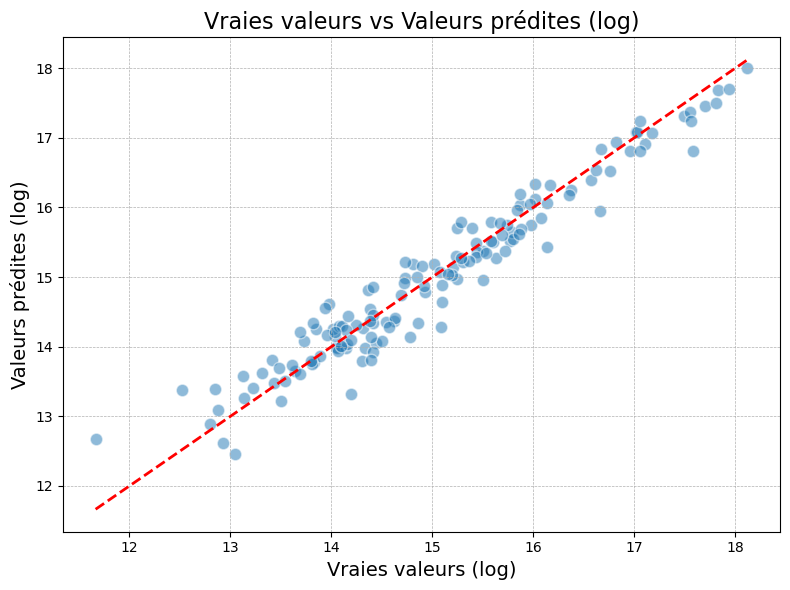

In [387]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour bien remplir la figure
plt.show()


#### Avec les valeurs réelles

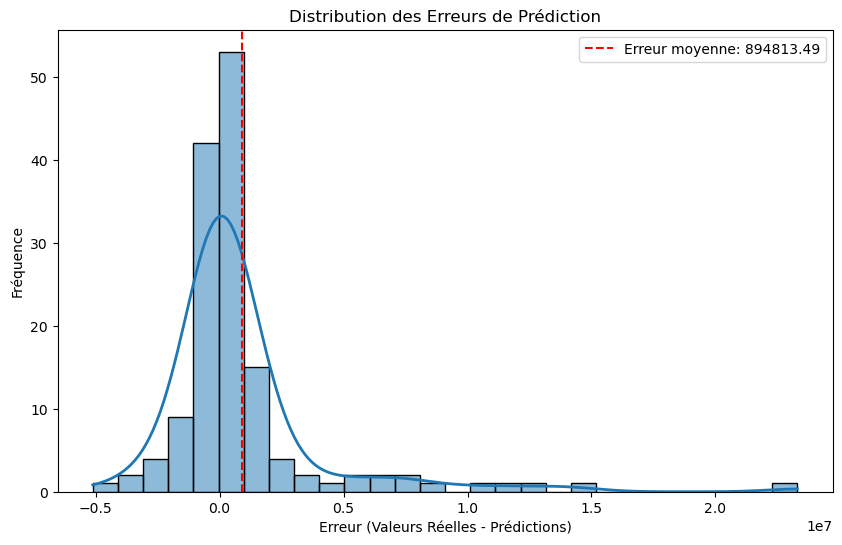

In [388]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_original = np.exp(y_test_pred) 
y_test_original = np.exp(y_test)  

# Calcul des erreurs
errors = y_test_original - y_test_pred_original

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color=colors_tab10[0], binwidth=1000000, line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

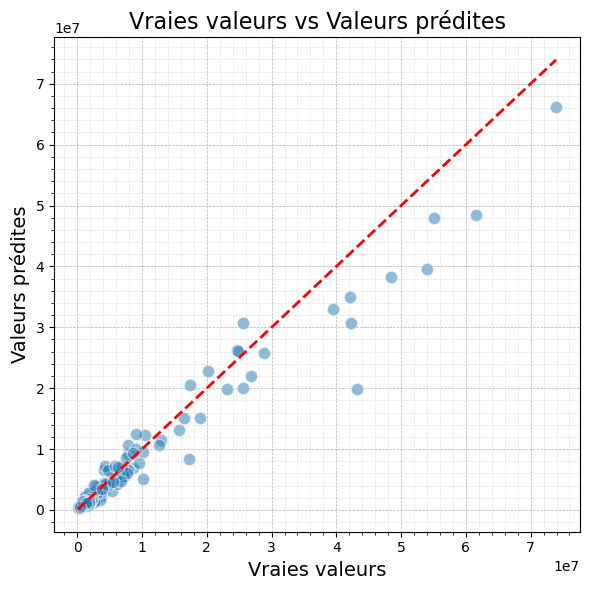

In [389]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [390]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_original, 'Valeurs prédites': y_test_pred_original})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

     Valeurs réelles  Valeurs prédites  Erreurs absolues
202       43178016.0      1.987391e+07      2.330410e+07
162       53974556.0      3.954801e+07      1.442655e+07
128       61576184.0      4.852269e+07      1.305350e+07
110       42227404.0      3.071554e+07      1.151186e+07
145       48479988.0      3.830458e+07      1.017541e+07
313       17186624.0      8.425465e+06      8.761159e+06
2         73937112.0      6.614497e+07      7.792144e+06
153       55140300.0      4.788994e+07      7.250360e+06
126       42071712.0      3.502693e+07      7.044780e+06
356       39518364.0      3.296239e+07      6.555973e+06
283       25567108.0      2.006293e+07      5.504178e+06
841       10133933.0      5.008586e+06      5.125347e+06
394       25585012.0      3.070595e+07      5.120935e+06
104       26831896.0      2.200964e+07      4.822254e+06
119       18982748.0      1.508589e+07      3.896860e+06


In [391]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
202                1.0               7            351530             23.0   
162                1.0              30            755000             72.0   
128                1.0              63           1354987             89.0   
110                1.0              33            791396             89.0   
145                1.0              42            635824             69.0   
313                1.0               5            251044             99.0   
2                  1.0              41            956110             43.0   
153                1.0              55           1400000             92.0   
126                1.0              37           1052469             93.0   
356                1.0              42           1249055             95.0   
283                1.0               7            287853             43.0   
841                1.0               1             24377              6.0   
394                1.0               6            320946             57.0   
104                1.0               8            254273             29.0   
119                1.0              15            388934             89.0   

     SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
202             43178016.0            1032.63           16   
162             53974556.0             793.05           31   
128             61576184.0             429.27           26   
110             42227404.0             313.30           40   
145             48479988.0             337.97           40   
313             17186624.0             119.81           16   
2               73937112.0            2089.28           47   
153             55140300.0             588.90           28   
126             42071712.0             287.32           14   
356             39518364.0             264.78           35   
283             25567108.0             182.14            7   
841             10133933.0             260.32           43   
394             25585012.0             189.85          106   
104             26831896.0             780.84           13   
119             18982748.0             213.23           94   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
202                         1      0.000000        62.026685       36.888513   
162                         5      0.962287        80.037644       15.760841   
128                         2      0.000000        99.999994        0.000000   
110                         5      0.000000        96.713587        1.274649   
145                         5      0.000000        99.999988        0.000000   
313                         2      0.000000        99.999994        0.000000   
2                           1     29.168781        66.984851        2.020366   
153                         4      3.952622        89.721733        2.587654   
126                         9      0.000000        97.960309        0.000000   
356                         5      0.000000        96.109001        0.000000   
283                         2      0.000000        99.669396        0.330597   
841                         1      0.000000        56.222920       40.987709   
394                         2      0.000000        98.515037        1.040539   
104                         1      0.000000        51.295451       48.061084   
119                         1      6.281197        91.580803        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
202        41.101522           0.000000   
162        14.668136           0.000000   
128        10.438400           0.000000   
110         0.000000           0.000000   
145         0.000000           0.000000   
313        45.898007           0.000000   
2          20.574829          79.121963   
153        16.992657           0.000000   
126        13.489986           0.000000   
356        13.456744           0.000000   
283         0.000000     

In [392]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(best_gb_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


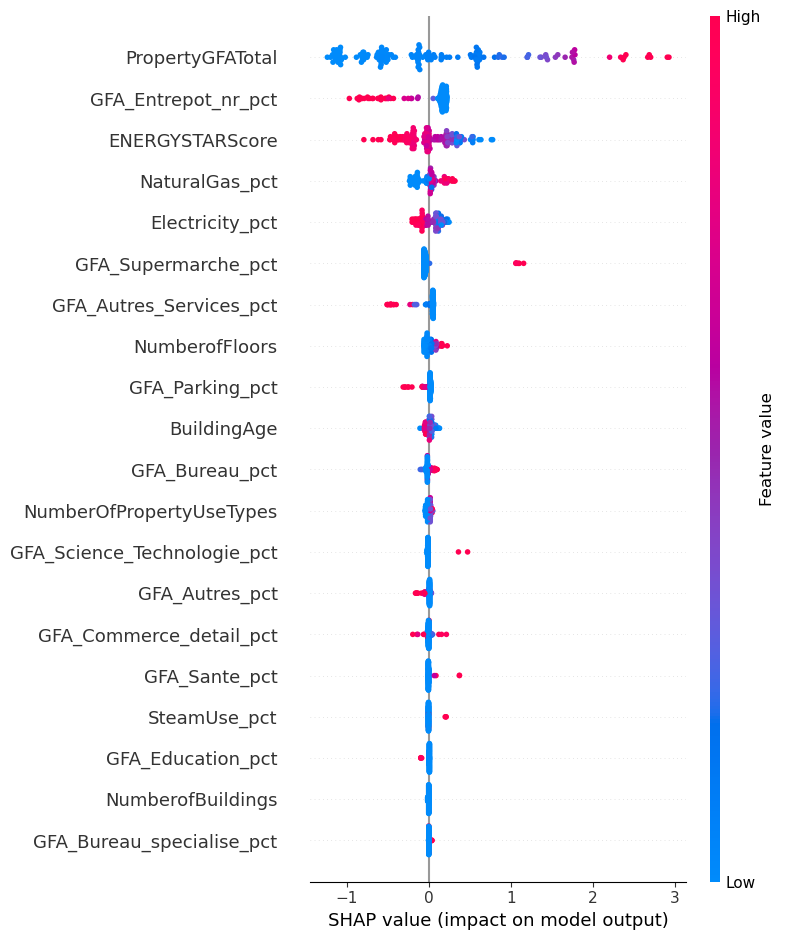

In [393]:
# Résumé de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

## Test sans l'Energy Star Score

### Importance des features

#### Data preparation

In [394]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN', 'ENERGYSTARScore'], axis=1)
target = df_nrjstar['Log_SiteEnergyUseWN']

In [395]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Parking_pct  GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              0.0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

#### Séparation des données

In [396]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 22), (145, 22))

In [397]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   BuildingAge                             580 non-null    int64  
 4   NumberOfPropertyUseTypes                580 non-null    int64  
 5   SteamUse_pct                            580 non-null    float64
 6   Electricity_pct                         580 non-null    float64
 7   NaturalGas_pct                          580 non-null    float64
 8   GFA_Parking_pct                         580 non-null    float64
 9   GFA_Residence_pct                       580 non-null    float64
 10  GFA_Loisirs_Shopping_ServicesPerso_pct  580 non-null    float64
 

In [398]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638                1.0               3             39927           42   
7                  1.0              11            153163           47   
606                1.0               2             21128           57   
889                1.0               2             21200           18   
580                1.0               1             36444           56   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                         2      0.000000        93.117487        0.000000   
7                           1     31.460248        37.169778       27.583765   
606                         1      0.000000        99.999979        0.000000   
889                         2      0.000000       100.000000        0.000000   
580                         1      0.000000        95.188896        0.000000   

     GFA_Parking_pct  GFA_Residence_pct  \
638         0.000000           0.000000   
7          12.587244          87.412756   
606         0.000000           0.000000   
889         0.000000           0.000000   
580         0.000000           0.000000   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                                     0.0                      0.0   
7                                       0.0                      0.0   
606                                     0.0                      0.0   
889                                     0.0                      0.0   
580                                     0.0                      0.0   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638        0.966764                0.0                 0.000000   
7          0.000000                0.0                 0.000000   
606        0.000000                0.0                 0.000000   
889        0.000000                0.0                66.830189   
580        0.000000                0.0                 0.000000   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638       99.033236                  0.0            0.0   
7          0.000000                  0.0            0.0   
606      100.000000                  0.0            0.0   
889       33.169811                  0.0            0.0   
580        0.000000                100.0            0.0   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                        0.0                                  0.0   
7                          0.0                                  0.0   
606                        0.0                                  0.0   
889                        0.0                                  0.0   
580                        0.0                                  0.0   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                          0.0                  0.0  
7                            0.0                  0.0  
606                          0.0                  0.0  
889                          0.0                  0.0  
580                          0.0                  0.0

In [399]:
y_train.head()

638    15.158941
7      16.627736
606    12.986782
889    14.318075
580    12.040396
Name: Log_SiteEnergyUseWN, dtype: float64

#### Standardisation

In [400]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [401]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638          -0.088885       -0.208439         -0.361989    -0.451947   
7            -0.088885        1.081104          0.228270    -0.292093   
606          -0.088885       -0.369632         -0.459982     0.027616   
889          -0.088885       -0.369632         -0.459607    -1.219248   
580          -0.088885       -0.530825         -0.380145    -0.004355   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                  0.517505     -0.234397         0.924016       -1.052039   
7                   -0.722797      3.420266        -1.120001        0.107293   
606                 -0.722797     -0.234397         1.175463       -1.052039   
889                  0.517505     -0.234397         1.175464       -1.052039   
580                 -0.722797     -0.234397         0.999693       -1.052039   

     GFA_Parking_pct  GFA_Residence_pct  \
638        -0.359810          -0.281954   
7           1.017538           3.546663   
606        -0.359810          -0.281954   
889        -0.359810          -0.281954   
580        -0.359810          -0.281954   

     GFA_Loisirs_Shopping_ServicesPerso_pct  GFA_Autres_Services_pct  \
638                               -0.065082                -0.379602   
7                                 -0.065082                -0.379602   
606                               -0.065082                -0.379602   
889                               -0.065082                -0.379602   
580                               -0.065082                -0.379602   

     GFA_Autres_pct  GFA_Education_pct  GFA_Commerce_detail_pct  \
638       -0.147786          -0.268631                -0.327182   
7         -0.238341          -0.268631                -0.327182   
606       -0.238341          -0.268631                -0.327182   
889       -0.238341          -0.268631                 2.418859   
580       -0.238341          -0.268631                -0.327182   

     GFA_Bureau_pct  GFA_Entrepot_nr_pct  GFA_Sante_pct  \
638        1.679813            -0.554327      -0.149799   
7         -0.787685            -0.554327      -0.149799   
606        1.703901            -0.554327      -0.149799   
889        0.038770            -0.554327      -0.149799   
580       -0.787685             2.050971      -0.149799   

     GFA_Bureau_specialise_pct  GFA_Restauration_Divertissement_pct  \
638                  -0.203529                            -0.151915   
7                    -0.203529                            -0.151915   
606                  -0.203529                            -0.151915   
889                  -0.203529                            -0.151915   
580                  -0.203529                            -0.151915   

     GFA_Science_Technologie_pct  GFA_Supermarche_pct  
638                    -0.064673            -0.216399  
7                      -0.064673            -0.216399  
606                    -0.064673            -0.216399  
889                    -0.064673            -0.216399  
580                    -0.064673            -0.216399

#### Test de Student

In [402]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.683
Model:                             OLS   Adj. R-squared:                  0.671
Method:                  Least Squares   F-statistic:                     54.61
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):          1.92e-123
Time:                         11:57:38   Log-Likelihood:                -600.83
No. Observations:                  580   AIC:                             1248.
Df Residuals:                      557   BIC:                             1348.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [403]:
# Suppression du NumberofFloors
X_train_scaled_df.drop(columns=['GFA_Parking_pct'], inplace=True)

In [404]:
# Ajout d'une constante à X pour le terme d'interception
X_train_const = sm.add_constant(X_train_scaled_df)

# Ajuster le modèle de régression linéaire avec statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Obtenir et afficher le résumé du modèle
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Log_SiteEnergyUseWN   R-squared:                       0.683
Model:                             OLS   Adj. R-squared:                  0.671
Method:                  Least Squares   F-statistic:                     57.21
Date:                 Mon, 04 Mar 2024   Prob (F-statistic):          3.46e-124
Time:                         11:57:39   Log-Likelihood:                -601.17
No. Observations:                  580   AIC:                             1246.
Df Residuals:                      558   BIC:                             1342.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

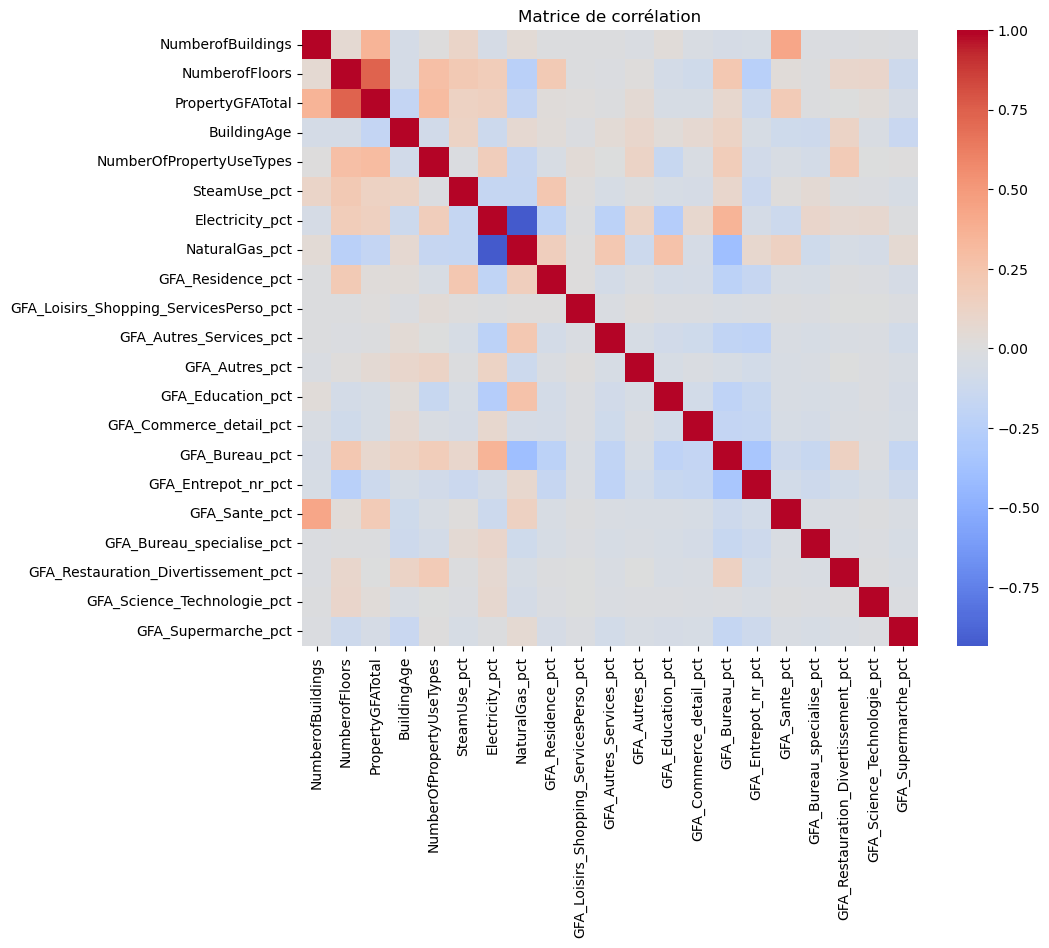

In [405]:
# Calcul de la matrice de corrélation
corr_matrix = X_train_scaled_df.corr()

# Création d'une heatmap avec seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True, square=True, center=0)

# Titre et affichage du graphique
plt.title('Matrice de corrélation')
plt.show()

### Tests de modèles

#### Data preparation

In [406]:
# Sélection des variables explicatives et des variables cibles
features = df_nrjstar.drop(['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'Log_TotalGHGEmissions', 'Log_SiteEnergyUseWN',
                            'ENERGYSTARScore', 'GFA_Parking_pct'], axis=1)
target = df_nrjstar['Log_SiteEnergyUseWN']

# Transformation des variables catégorielles en variables numériques (encodage one-hot)
features = pd.get_dummies(features)

In [407]:
features.head(1)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
0                1.0              12             88434           89   

   NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
0                         1      26.87282        52.917723        17.11772   

   GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
0              100.0                                     0.0   

   GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
0                      0.0             0.0                0.0   

   GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
0                      0.0             0.0                  0.0   

   GFA_Sante_pct  GFA_Bureau_specialise_pct  \
0            0.0                        0.0   

   GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
0                                  0.0                          0.0   

   GFA_Supermarche_pct  
0                  0.0

In [408]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Conservez les noms des colonnes dans une variable avant la mise à l'échelle
column_names = X_train.columns

# Affichage des dimensions des ensembles d'entraînement et de test
X_train.shape, X_test.shape

((580, 21), (145, 21))

In [409]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 638 to 146
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NumberofBuildings                       580 non-null    float64
 1   NumberofFloors                          580 non-null    int64  
 2   PropertyGFATotal                        580 non-null    int64  
 3   BuildingAge                             580 non-null    int64  
 4   NumberOfPropertyUseTypes                580 non-null    int64  
 5   SteamUse_pct                            580 non-null    float64
 6   Electricity_pct                         580 non-null    float64
 7   NaturalGas_pct                          580 non-null    float64
 8   GFA_Residence_pct                       580 non-null    float64
 9   GFA_Loisirs_Shopping_ServicesPerso_pct  580 non-null    float64
 10  GFA_Autres_Services_pct                 580 non-null    float64
 

In [410]:
X_train.head()

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638                1.0               3             39927           42   
7                  1.0              11            153163           47   
606                1.0               2             21128           57   
889                1.0               2             21200           18   
580                1.0               1             36444           56   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                         2      0.000000        93.117487        0.000000   
7                           1     31.460248        37.169778       27.583765   
606                         1      0.000000        99.999979        0.000000   
889                         2      0.000000       100.000000        0.000000   
580                         1      0.000000        95.188896        0.000000   

     GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
638           0.000000                                     0.0   
7            87.412756                                     0.0   
606           0.000000                                     0.0   
889           0.000000                                     0.0   
580           0.000000                                     0.0   

     GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
638                      0.0        0.966764                0.0   
7                        0.0        0.000000                0.0   
606                      0.0        0.000000                0.0   
889                      0.0        0.000000                0.0   
580                      0.0        0.000000                0.0   

     GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
638                 0.000000       99.033236                  0.0   
7                   0.000000        0.000000                  0.0   
606                 0.000000      100.000000                  0.0   
889                66.830189       33.169811                  0.0   
580                 0.000000        0.000000                100.0   

     GFA_Sante_pct  GFA_Bureau_specialise_pct  \
638            0.0                        0.0   
7              0.0                        0.0   
606            0.0                        0.0   
889            0.0                        0.0   
580            0.0                        0.0   

     GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
638                                  0.0                          0.0   
7                                    0.0                          0.0   
606                                  0.0                          0.0   
889                                  0.0                          0.0   
580                                  0.0                          0.0   

     GFA_Supermarche_pct  
638                  0.0  
7                    0.0  
606                  0.0  
889                  0.0  
580                  0.0

#### Standardisation

In [411]:
# Initialisation du StandardScaler
scaler = StandardScaler()

In [412]:
# Normalisation des ensembles d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Affichage des premières lignes des données normalisées pour vérification
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=column_names)
X_train_scaled_df.head(5)

NumberofBuildings  NumberofFloors  PropertyGFATotal  BuildingAge  \
638          -0.088885       -0.208439         -0.361989    -0.451947   
7            -0.088885        1.081104          0.228270    -0.292093   
606          -0.088885       -0.369632         -0.459982     0.027616   
889          -0.088885       -0.369632         -0.459607    -1.219248   
580          -0.088885       -0.530825         -0.380145    -0.004355   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
638                  0.517505     -0.234397         0.924016       -1.052039   
7                   -0.722797      3.420266        -1.120001        0.107293   
606                 -0.722797     -0.234397         1.175463       -1.052039   
889                  0.517505     -0.234397         1.175464       -1.052039   
580                 -0.722797     -0.234397         0.999693       -1.052039   

     GFA_Residence_pct  GFA_Loisirs_Shopping_ServicesPerso_pct  \
638          -0.281954                               -0.065082   
7             3.546663                               -0.065082   
606          -0.281954                               -0.065082   
889          -0.281954                               -0.065082   
580          -0.281954                               -0.065082   

     GFA_Autres_Services_pct  GFA_Autres_pct  GFA_Education_pct  \
638                -0.379602       -0.147786          -0.268631   
7                  -0.379602       -0.238341          -0.268631   
606                -0.379602       -0.238341          -0.268631   
889                -0.379602       -0.238341          -0.268631   
580                -0.379602       -0.238341          -0.268631   

     GFA_Commerce_detail_pct  GFA_Bureau_pct  GFA_Entrepot_nr_pct  \
638                -0.327182        1.679813            -0.554327   
7                  -0.327182       -0.787685            -0.554327   
606                -0.327182        1.703901            -0.554327   
889                 2.418859        0.038770            -0.554327   
580                -0.327182       -0.787685             2.050971   

     GFA_Sante_pct  GFA_Bureau_specialise_pct  \
638      -0.149799                  -0.203529   
7        -0.149799                  -0.203529   
606      -0.149799                  -0.203529   
889      -0.149799                  -0.203529   
580      -0.149799                  -0.203529   

     GFA_Restauration_Divertissement_pct  GFA_Science_Technologie_pct  \
638                            -0.151915                    -0.064673   
7                              -0.151915                    -0.064673   
606                            -0.151915                    -0.064673   
889                            -0.151915                    -0.064673   
580                            -0.151915                    -0.064673   

     GFA_Supermarche_pct  
638            -0.216399  
7              -0.216399  
606            -0.216399  
889            -0.216399  
580            -0.216399

#### Test multi modèles

In [413]:
# Liste de modèles à évaluer
models = [
    ('DummyRegressorMedian', DummyRegressor(strategy='median')),
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet(random_state=0)),
    ('RandomForest', RandomForestRegressor(random_state=0)),
    ('GradientBoostingReg', GradientBoostingRegressor(random_state=0)),
    ('XGBoostReg', XGBRegressor(random_state=0)),
    ('SVR', SVR()),
    ('AdaBoostReg', AdaBoostRegressor(random_state=0))
]

# Tableau pour collecter les résultats
results = []

# Évaluer chaque modèle
for name, model in models:
    # Entraîner le modèle
    start_time = time.time() 
    model.fit(X_train_scaled, y_train)
    end_time = time.time()  # Enregistre le temps de fin
    duration = end_time - start_time  # Calcule la durée
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # RMSE CV
    scores_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-scores_rmse).mean()
    
    # R2 CV
    scores_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    r2_cv = scores_r2.mean()
    r2_cv_std = scores_r2.std() 
    
    results.append((name, rmse, mae, r2, rmse_cv, r2_cv, r2_cv_std, duration))


In [414]:
# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results, columns=['Modèle', 'RMSE', 'MAE', 'R2', 'RMSE CV', 'R2 CV', 'R2 CV Std', 'Temps de calcul'])
df_sorted_by_performance = df_results.sort_values(by=['R2 CV'], ascending=[False])

df_sorted_by_performance

Modèle      RMSE       MAE        R2   RMSE CV     R2 CV  \
6   GradientBoostingReg  0.441375  0.338386  0.882982  0.498957  0.826037   
5          RandomForest  0.485632  0.357012  0.858338  0.515881  0.813930   
7            XGBoostReg  0.560029  0.423538  0.811609  0.543666  0.794860   
9           AdaBoostReg  0.512194  0.397394  0.842417  0.568338  0.775325   
8                   SVR  0.626829  0.491562  0.763987  0.677193  0.679036   
1      LinearRegression  0.704904  0.553160  0.701531  0.735166  0.621057   
2                 Ridge  0.708800  0.555983  0.698223  0.736065  0.620256   
4            ElasticNet  1.136570  0.946616  0.224054  1.107633  0.150978   
3                 Lasso  1.299643  1.050432 -0.014582  1.214297 -0.020744   
0  DummyRegressorMedian  1.321536  1.055894 -0.049052  1.220916 -0.031148   

   R2 CV Std  Temps de calcul  
6   0.030264         0.142538  
5   0.033552         0.415113  
7   0.022361         0.078522  
9   0.025013         0.077521  
8   0.046247         0.012002  
1   0.085714         0.001001  
2   0.083654         0.001000  
4   0.016961         0.001000  
3   0.023509         0.000000  
0   0.026867         0.001000

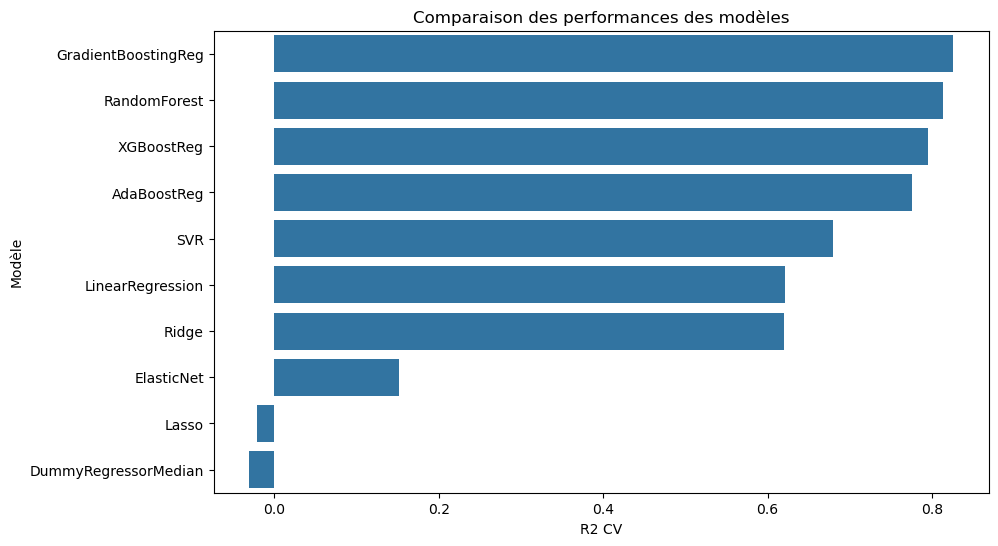

In [415]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 CV', y='Modèle', data=df_sorted_by_performance)
plt.title('Comparaison des performances des modèles')
plt.show()

Les modèles Gradient Boosting Regressor est nettement supérieur aux autres si on regarde le R² avec CV.

### Optimisation du GradientBoostingReg

#### Le modèle de base

In [416]:
# Création du modèle Gradient Boosting
gb_model = GradientBoostingRegressor()

# Entraînement du modèle sur les données d'entraînement
gb_model.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_gb = gb_model.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_base = r2_score(y_test, y_pred_gb)
mae_base = mean_absolute_error(y_test, y_pred_gb)

print("Métriques pour le modèle GBR :")
print("RMSE :", rmse_base)
print("R² :", r2_base)
print("MAE :", mae_base)

Métriques pour le modèle GBR :
RMSE : 0.4416297893083096
R² : 0.882846351427969
MAE : 0.33837766962905846


In [417]:
importances_gb = gb_model.feature_importances_

# Création d'un DataFrame pour afficher l'importance des variables
features_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_gb})
features_gb = features_gb.sort_values(by='Importance', ascending=False)

# Tri des caractéristiques par importance croissante
features_gb = features_gb.sort_values('Importance', ascending=False)

print(features_gb)

                                   Feature  Importance
2                         PropertyGFATotal    0.719088
15                     GFA_Entrepot_nr_pct    0.085601
20                     GFA_Supermarche_pct    0.068170
7                           NaturalGas_pct    0.022868
6                          Electricity_pct    0.020620
19             GFA_Science_Technologie_pct    0.017758
3                              BuildingAge    0.014674
10                 GFA_Autres_Services_pct    0.013805
0                        NumberofBuildings    0.009533
1                           NumberofFloors    0.008750
16                           GFA_Sante_pct    0.006373
13                 GFA_Commerce_detail_pct    0.003058
11                          GFA_Autres_pct    0.002126
17               GFA_Bureau_specialise_pct    0.002028
5                             SteamUse_pct    0.001366
12                       GFA_Education_pct    0.001260
14                          GFA_Bureau_pct    0.001096
8         

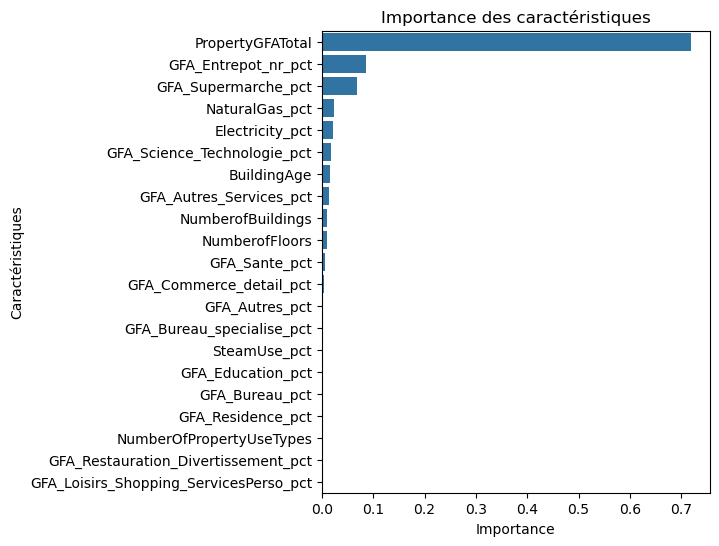

In [418]:
plt.figure(figsize=(5, 6))
sns.barplot(x="Importance", y="Feature", data=features_gb)
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.show()

#### Recherche des hyperparamètres

In [419]:
# Définition des hyperparamètres à tester
param_dist = {
    'n_estimators': np.arange(50, 500, 10),
    'learning_rate': np.linspace(0.008, 0.2, 20),
    'max_depth': np.arange(2, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
    'subsample': np.linspace(0.3, 0.9, 20)
}

# Initialisation de la recherche aléatoire
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécution de la recherche aléatoire sur le jeu d'entraînement
random_search.fit(X_train_scaled, y_train)

# Récupération du meilleur modèle
best_gb_model = random_search.best_estimator_

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR: ", random_search.best_params_)
meilleur_score_rmse_bgr = np.sqrt(-random_search.best_score_) 
print("Meilleur score (RMSE) pour GBR: ", meilleur_score_rmse_bgr)

Meilleurs hyperparamètres (RandomizedSearchCV) pour GBR:  {'subsample': 0.3, 'n_estimators': 470, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 8, 'learning_rate': 0.018105263157894735}
Meilleur score (RMSE) pour GBR:  0.4772723600096299


In [420]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'learning_rate': [0.04, 0.07, 0.1],
    'max_depth': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 6, 8],
    'n_estimators': [60, 260, 460],
    'subsample': [0.5, 0.6]
}

# Configuration de GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Exécution de la recherche d'hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le meilleur modèle
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcul des métriques pour le meilleur modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = 100 * np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test)))

print("RMSE avec GridSearchCV pour GBR: {:.4f}".format(rmse))
print("MAE avec GridSearchCV pour GBR: {:.4f}".format(mae))
print("R2 avec GridSearchCV pour GBR: {:.4f}".format(r2))
print("SMAPE avec GridSearchCV pour GBR: {:.4f}%".format(smape))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs paramètres : {'learning_rate': 0.07, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 260, 'subsample': 0.6}
RMSE avec GridSearchCV pour GBR: 0.4371
MAE avec GridSearchCV pour GBR: 0.3406
R2 avec GridSearchCV pour GBR: 0.8852
SMAPE avec GridSearchCV pour GBR: 2.3141%


In [421]:
# Meilleurs hyperparamètres obtenus de GridSearchCV
best_paramsse = grid_search.best_params_

# Configuration du modèle avec les meilleurs hyperparamètres
best_gb_modelse = GradientBoostingRegressor(
    n_estimators=best_paramsse['n_estimators'],
    learning_rate=best_paramsse['learning_rate'],
    max_depth=best_paramsse['max_depth'],
    min_samples_split=best_paramsse['min_samples_split'],
    min_samples_leaf=best_paramsse['min_samples_leaf'],
    subsample=best_paramsse['subsample'],
    random_state=0
)

# Métriques à évaluer lors de la validation croisée
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

# Exécution de la validation croisée (5 plis)
cv_results = cross_validate(best_gb_model, X_train_scaled, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Calcul et affichage des métriques moyennes pour chaque pli
rmsese_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2se_scores = cv_results['test_r2']
maese_scores = -cv_results['test_neg_mean_absolute_error']

# Affichage avec écart type
print(f"Validation Croisée RMSE: {rmsese_scores.mean():.4f} (± {rmsese_scores.std():.4f})")
print(f"Validation Croisée MAE: {maese_scores.mean():.4f} (± {maese_scores.std():.4f})")
print(f"Validation Croisée R²: {r2se_scores.mean():.4f} (± {r2se_scores.std():.4f})")

Validation Croisée RMSE: 0.4829 (± 0.0470)
Validation Croisée MAE: 0.3650 (± 0.0310)
Validation Croisée R²: 0.8359 (± 0.0347)


In [422]:
best_gb_modelse.fit(X_train_scaled, y_train) 

# Prédictions sur l'ensemble d'entraînement
y_train_predse = best_gb_modelse.predict(X_train_scaled)

# Prédictions sur l'ensemble de test
y_test_predse = best_gb_modelse.predict(X_test_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
train_rmsese = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2se = r2_score(y_train, y_train_pred)
train_maese = mean_absolute_error(y_train, y_train_pred)

# Calcul des métriques pour l'ensemble de test
test_rmsese = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2se = r2_score(y_test, y_test_pred)
test_maese = mean_absolute_error(y_test, y_test_pred)

# Affichage des métriques
print("Ensemble d'entraînement : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(train_rmsese, train_r2, train_mae))
print("Ensemble de test : RMSE = {:.4f}, R² = {:.4f}, MAE = {:.4f}".format(test_rmsese, test_r2, test_mae))

Ensemble d'entraînement : RMSE = 0.1677, R² = 0.9808, MAE = 0.1269
Ensemble de test : RMSE = 0.3180, R² = 0.9393, MAE = 0.2459


### Analyse des erreurs

#### Avec les cibles en log

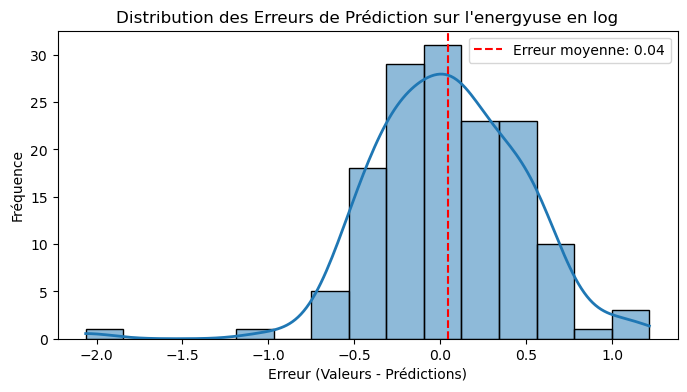

In [423]:
# Calcul des erreurs
errors = y_test - y_test_predse

# Calcul de l'erreur moyenne
mean_error = np.mean(errors)

# Visualisation de la distribution des erreurs
# Couleurs de la palette tab10
colors_tab10 = plt.cm.tab10(np.arange(10))
plt.figure(figsize=(8, 4))
sns.histplot(errors, kde=True, color=colors_tab10[0], line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction sur l\'energyuse en log')
plt.xlabel('Erreur (Valeurs - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

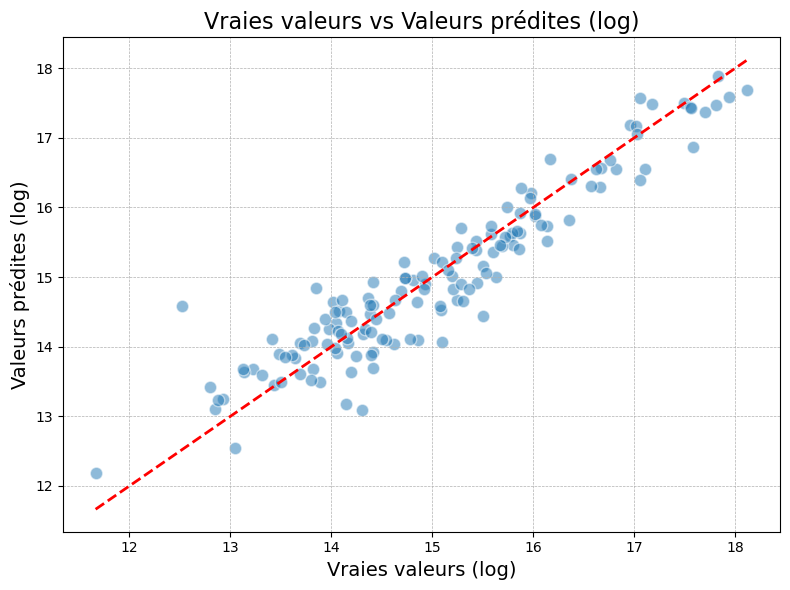

In [424]:
plt.figure(figsize=(8, 6))  # Augmenter la taille du graphique
plt.scatter(y_test, y_test_predse, alpha=0.5, edgecolors='w', s=80)  # Ajouter des bords blancs pour mieux distinguer les points superposés
plt.title('Vraies valeurs vs Valeurs prédites (log)', fontsize=16)
plt.xlabel('Vraies valeurs (log)', fontsize=14)
plt.ylabel('Valeurs prédites (log)', fontsize=14)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Grille plus fine
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7)  # Grille mineure
plt.tight_layout() 
plt.show()


#### Avec les valeurs réelles

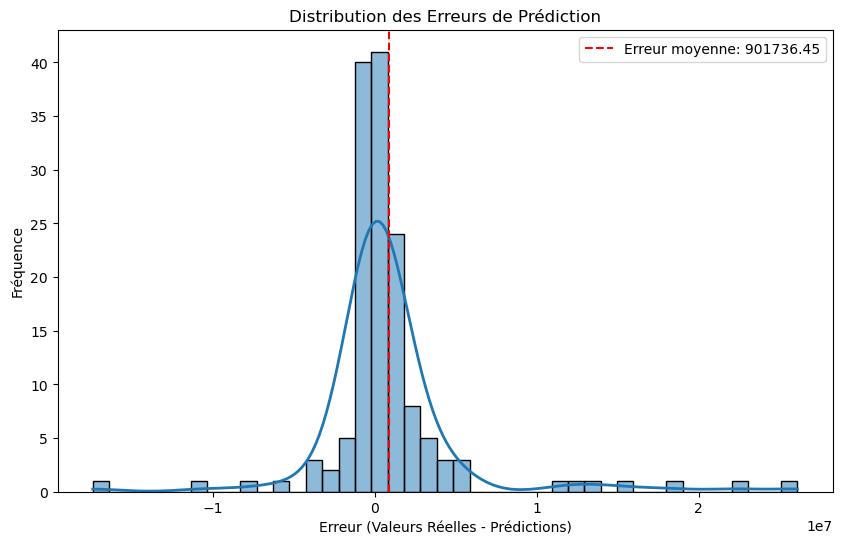

In [425]:
# Conversion des prédictions et des valeurs réelles de test de log à l'échelle originale
y_test_pred_originalse = np.exp(y_test_predse) 
y_test_originalse = np.exp(y_test)  

# Calcul des erreurs
errorsse = y_test_originalse - y_test_pred_originalse

# Calcul de l'erreur moyenne
mean_error = np.mean(errorsse)

# Visualisation de la distribution des erreurs
plt.figure(figsize=(10, 6))
sns.histplot(errorsse, kde=True, color=colors_tab10[0], binwidth=1000000, line_kws={'color': colors_tab10[1], 'linewidth': 2})
plt.axvline(mean_error, color='red', linestyle='--', label=f'Erreur moyenne: {mean_error:.2f}')
plt.title('Distribution des Erreurs de Prédiction')
plt.xlabel('Erreur (Valeurs Réelles - Prédictions)')
plt.ylabel('Fréquence')
plt.legend()

plt.show()

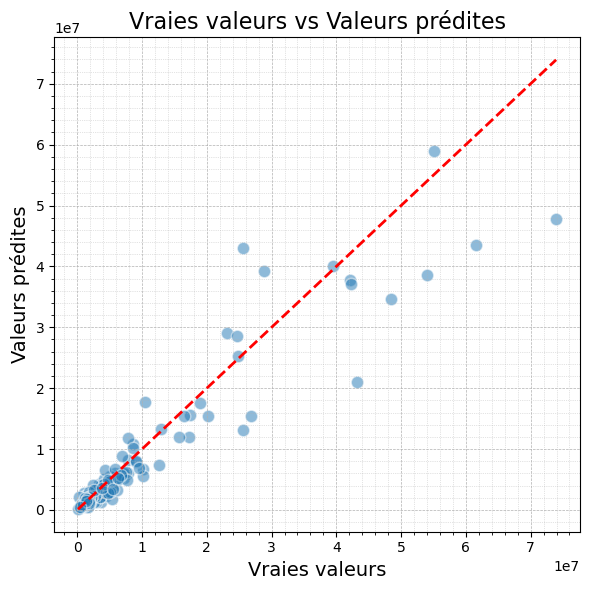

In [426]:
plt.figure(figsize=(6, 6)) 
plt.scatter(y_test_original, y_test_pred_originalse, alpha=0.5, edgecolors='w', s=80)  
plt.title('Vraies valeurs vs Valeurs prédites', fontsize=16)
plt.xlabel('Vraies valeurs', fontsize=14)
plt.ylabel('Valeurs prédites', fontsize=14)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', lw=2, linestyle='--')  # Ligne y=x
plt.grid(True, which='major', linestyle='--', linewidth=0.5) 
plt.minorticks_on() 
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.7) 
plt.tight_layout() 
plt.show()

In [427]:
# Création d'un DataFrame avec les valeurs réelles et prédites
df_errors = pd.DataFrame({'Valeurs réelles': y_test_originalse, 'Valeurs prédites': y_test_pred_originalse})


# Calcul des erreurs absolues et ajout en tant que nouvelle colonne
df_errors['Erreurs absolues'] = abs(df_errors['Valeurs réelles'] - df_errors['Valeurs prédites'])

# Trier le DataFrame par les erreurs absolues de façon décroissante
df_errors_sorted = df_errors.sort_values('Erreurs absolues', ascending=False)

# Afficher les 15 erreurs les plus grandes
print(df_errors_sorted.head(15))

     Valeurs réelles  Valeurs prédites  Erreurs absolues
2         73937112.0      4.785614e+07      2.608097e+07
202       43178016.0      2.100986e+07      2.216816e+07
128       61576184.0      4.349340e+07      1.808278e+07
394       25585012.0      4.300203e+07      1.741702e+07
162       53974556.0      3.862327e+07      1.535128e+07
145       48479988.0      3.473119e+07      1.374880e+07
283       25567108.0      1.314653e+07      1.242058e+07
104       26831896.0      1.535367e+07      1.147823e+07
65        28763498.0      3.919767e+07      1.043418e+07
120       10471812.0      1.780477e+07      7.332954e+06
342       23128454.0      2.909272e+07      5.964261e+06
313       17186624.0      1.190864e+07      5.277984e+06
95        12616417.0      7.426708e+06      5.189709e+06
110       42227404.0      3.705264e+07      5.174760e+06
43        20194606.0      1.545949e+07      4.735118e+06


In [428]:
indices_plus_gd_erreurs = df_errors_sorted.head(15).index
df_top_errors = df.loc[indices_plus_gd_erreurs]
df_top_errors

NumberofBuildings  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
2                  1.0              41            956110             43.0   
202                1.0               7            351530             23.0   
128                1.0              63           1354987             89.0   
394                1.0               6            320946             57.0   
162                1.0              30            755000             72.0   
145                1.0              42            635824             69.0   
283                1.0               7            287853             43.0   
104                1.0               8            254273             29.0   
65                 1.0               1            530039             98.0   
120                1.0              22            384302             98.0   
342                1.0              18            363934             68.0   
313                1.0               5            251044             99.0   
95                 1.0              16            106860             49.0   
110                1.0              33            791396             89.0   
43                 1.0               7            282863             37.0   

     SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingAge  \
2               73937112.0            2089.28           47   
202             43178016.0            1032.63           16   
128             61576184.0             429.27           26   
394             25585012.0             189.85          106   
162             53974556.0             793.05           31   
145             48479988.0             337.97           40   
283             25567108.0             182.14            7   
104             26831896.0             780.84           13   
65              28763498.0             723.47           65   
120             10471812.0              70.15           87   
342             23128454.0             582.28           91   
313             17186624.0             119.81           16   
95              12616417.0             469.57           85   
110             42227404.0             313.30           40   
43              20194606.0             526.85           26   

     NumberOfPropertyUseTypes  SteamUse_pct  Electricity_pct  NaturalGas_pct  \
2                           1     29.168781        66.984851        2.020366   
202                         1      0.000000        62.026685       36.888513   
128                         2      0.000000        99.999994        0.000000   
394                         2      0.000000        98.515037        1.040539   
162                         5      0.962287        80.037644       15.760841   
145                         5      0.000000        99.999988        0.000000   
283                         2      0.000000        99.669396        0.330597   
104                         1      0.000000        51.295451       48.061084   
65                          2      0.000000        56.406662       39.955165   
120                         3      0.000000        96.090677        0.000000   
342                         3     26.332013        69.188978        0.051802   
313                         2      0.000000        99.999994        0.000000   
95                          1      0.000000        28.231010       66.373646   
110                         5      0.000000        96.713587        1.274649   
43                          2      0.000000        54.374183       41.984731   

     GFA_Parking_pct  GFA_Residence_pct  \
2          20.574829          79.121963   
202        41.101522           0.000000   
128        10.438400           0.000000   
394         0.000000           0.000000   
162        14.668136           0.000000   
145         0.000000           0.000000   
283         0.000000           0.000000   
104        12.286257          87.713743   
65          0.000000           0.000000   
120         0.000000           0.000000   
342         7.932757     

In [429]:
# Initialiser l'explainer SHAP
explainer = shap.TreeExplainer(best_gb_model)

# Calculer les valeurs SHAP pour l'ensemble d'entraînement
shap_values = explainer.shap_values(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


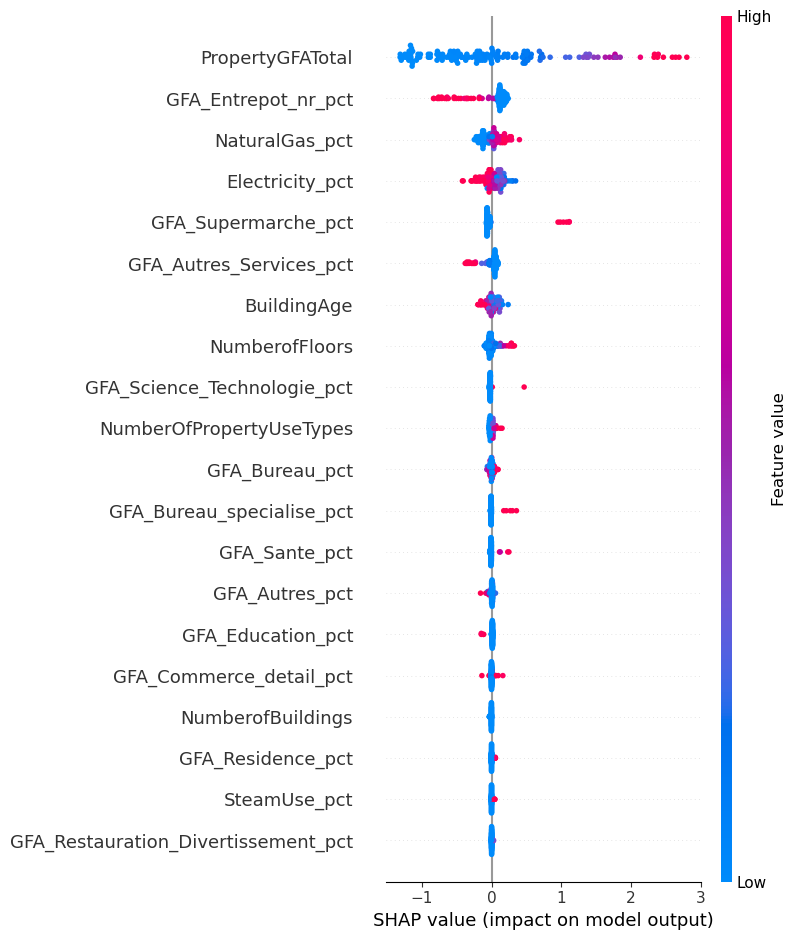

In [430]:
# Résumé de l'importance des caractéristiques
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)

# Comparaison 

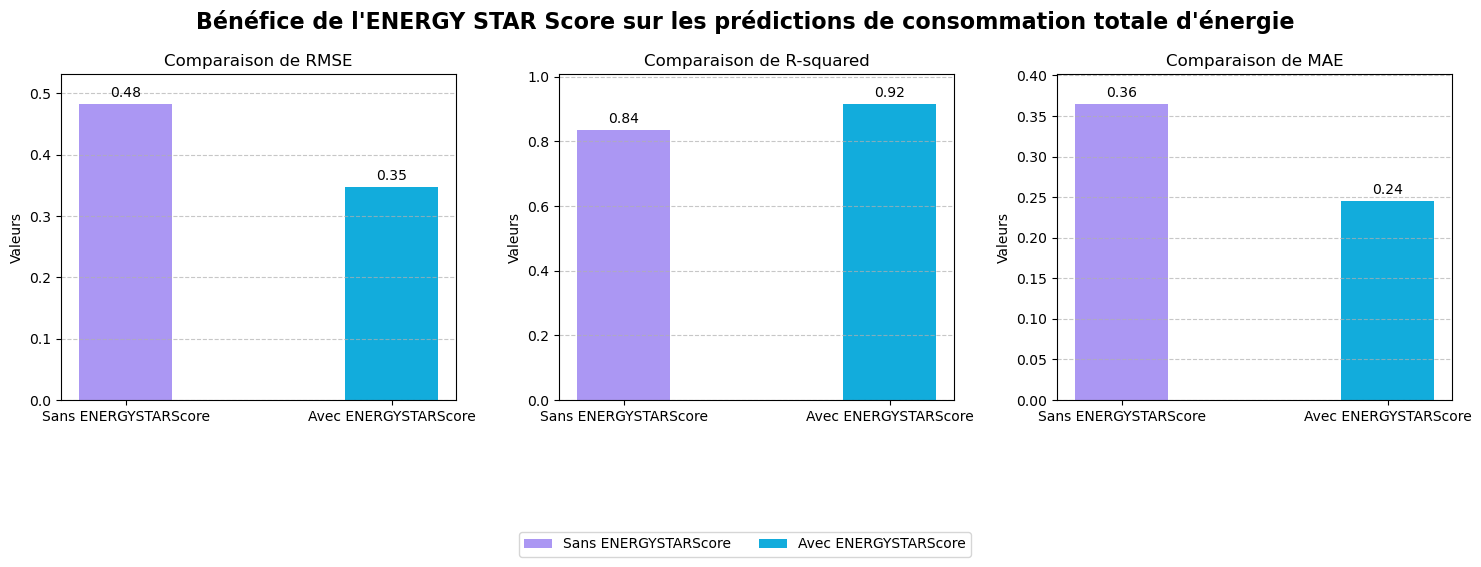

In [431]:
# Noms des métriques
metric_names = ['RMSE', 'R-squared', 'MAE']

metrics_gb_ESS = [np.mean(rmse_scores), np.mean(r2_scores), np.mean(mae_scores), np.nan]  
metrics_gb = [np.mean(rmsese_scores), np.mean(r2se_scores), np.mean(maese_scores), np.nan] 

# Largeur des barres
width = 0.35

# Création d'une ligne de trois graphiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Ajustement pour une ligne de trois graphiques

for i, ax in enumerate(axes):
    metric_name = metric_names[i]
    bars1 = ax.bar(0, metrics_gb[i], width, color='#AB97F3') 
    bars2 = ax.bar(1, metrics_gb_ESS[i], width, color='#12ACDC')
    
    # Ajout des étiquettes, titres et grilles
    ax.set_ylabel('Valeurs')
    ax.set_title(f'Comparaison de {metric_name}')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Sans ENERGYSTARScore', 'Avec ENERGYSTARScore'])
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajuster les limites de l'axe des y pour laisser plus d'espace au-dessus des barres
    ax.set_ylim(0, max(metrics_gb[i], metrics_gb_ESS[i]) * 1.1)  # Ajout de 10% de marge au-dessus des barres pour lisibilité
    
    # Ajout des valeurs sur les barres pour améliorer la lisibilité
    for bar in [bars1, bars2]:
        for rect in bar:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points de décalage vertical
                        textcoords="offset points",
                        ha='center', va='bottom')

# Ajuster la légende et le titre général
fig.legend([bars1, bars2], ['Sans ENERGYSTARScore', 'Avec ENERGYSTARScore'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.05))

fig.suptitle("Bénéfice de l'ENERGY STAR Score sur les prédictions de consommation totale d'énergie", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Ajustement de l'espacement pour la légende

plt.show()